# 回归分析三大假设
- 样本数据独立：彼此不相互影响；用残差检验是否独立
- 数据方差同质：变量或群组间分散程度接近；用同质性检验
- 数据正态分布：符合钟型图；用偏度和峰度检验
---


## 一、样本数据独立：彼此不相互影响；用残差检验是否独立

**样本数据独立性** 指样本中每个观测值都是相互独立的，即一个观测值的特征不会影响其他观测值的特征。

- 判读：残差独立应该表现出随机性，没有特定增长或降低的趋势。

**定义**：
   - 如果样本中每个数据点都相互独立，那么它们的联合概率表示为单个数据点概率的乘积。
   - 例如，如果 $ X_1, X_2, ..., X_n $是独立的，那么：
     $$
     P(X_1, X_2, ..., X_n) = P(X_1) \cdot P(X_2) \cdot ... \cdot P(X_n)
     $$


---

**示例：学生成绩受到前一个学生的影响**

假设研究一个班学生的学习时间（自变量 $x$）和考试成绩（因变量 $y$）之间的关系。  
这个班级有一个特别的**学习氛围**，学生之间的互相交流也将影响考试成绩。  
比如，学生A的性格坚韧不拔且成绩优异，那么A的性格特征（自变量 $x_{积极向上的精神}$）会激励学生B学习更努力，从而影响学生B的成绩。  
于是，学生B的成绩除了学习时间（自变量 $x$），还受学生A（自变量 $x_{积极向上的精神}$）的影响（这里未考虑到的自变量 $x_{积极向上的精神}$也是有残差 $e$的原因之一）。

**数据示例**

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） |
|------|----------------|----------------|
| 1    | 1              | 60             |
| 2    | 2              | 72             |
| 3    | 3              | 81             |
| 4    | 4              | 95             |
| 5    | 5              | 108            |

**线性回归模型**

我们拟合一个简单的线性回归模型 $ y = \beta_0 + \beta_1 x $，带入数据后，计算得到的回归系数为：

- $\beta_0 = 50$
- $\beta_1 = 10$

基于对数据的学习，我们得到了：   
(1) 预测模型：$\hat{y} = 50 + 10x $  
(2) 实际模型：$ y = 50 + 10x + e$  
(3) 残差 $e$：$e = y - \hat{y}$  

**非独立样本预测值 $\hat{y}$ 和残差 $e$ 如下：**

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） | $\hat{y} = 50 + 10x$ | 残差 $e = y - \hat{y}$ |
|------|----------------|----------------|------------------|---------------------|
| 1    | 1              | 60             | 60               | 0                   |
| 2    | 2              | 72             | 70               | 2                   |
| 3    | 3              | 81             | 80               | 1                   |
| 4    | 4              | 95             | 90               | 5                   |
| 5    | 5              | 108            | 100              | 8                   |

**在标准误和p值上的表现**

**标准误**：
   $$
   SE(\beta_1) = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n-2}} = 0
   $$

**p值**：
   由于标准误为0，p值不能计算，但假设有波动，p值会在显著水平上。

**考虑前一个学生成绩的线性回归模型**

为了更好地捕捉学生之间的相互影响，引入前一个学生的特征作为额外的变量（将未考虑到的自变量 $x_{积极向上的精神}$取名为$y_{i-1}$引入）：

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 y_{i-1} $$

假设计算得到的回归系数为：

- $\beta_0 = 50$
- $\beta_1 = 5$
- $\beta_2 = 0.2$

基于对数据的学习，我们得到了：   
(1) 预测模型：$\hat{y} = 50 + 5x + 0.2y_{i-1}$  
(2) 实际模型：$\hat{y} = 50 + 5x + 0.2y_{i-1} + e$ 
(3) 残差 $e$：$e = y - \hat{y}$  （为什么还有残差？）（不要感到奇怪，人脑不可能考虑到所有的变量，任何事物本来就没有通解，只能尽量预测和估计）

**独立样本预测值 $\hat{y}$ 和残差 $e$ 如下：**

| 学生 | 学习时间 $x$（小时） | 考试成绩 $y$（分数） | 前一个学生的成绩 $y_{i-1}$ | $\hat{y} = 50 + 5x + 0.2y_{i-1}$ | 残差 $e = y - \hat{y}$ |
|------|----------------|----------------|----------------------|--------------------------|---------------------|
| 1    | 1              | 60             | -                    | 55                       | 5                   |
| 2    | 2              | 72             | 60                   | 67                       | 5                   |
| 3    | 3              | 81             | 72                   | 79                       | 2                   |
| 4    | 4              | 95             | 81                   | 91                       | 4                   |
| 5    | 5              | 108            | 95                   | 103                      | 5                   |

**在标准误和p值上的表现**

**标准误**：
   $$
   SE(\beta_1) = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n-2}} = \sqrt{\frac{5^2 + 8^2 + 6^2 + 6^2 + 6^2}{5-2}} \approx 2.94
   $$

**p值**：
   计算p值假设：
   $$
   t = \frac{\beta_1}{SE(\beta_1)} = \frac{5}{2.94} \approx 1.70
   $$
   查表得出相应自由度下的p值。

**残差模式**

在这个改进的模型中，残差仍然显示出一些增长模式，但已经比之前的模型更随机，就意味着得到了一定的统计控制。

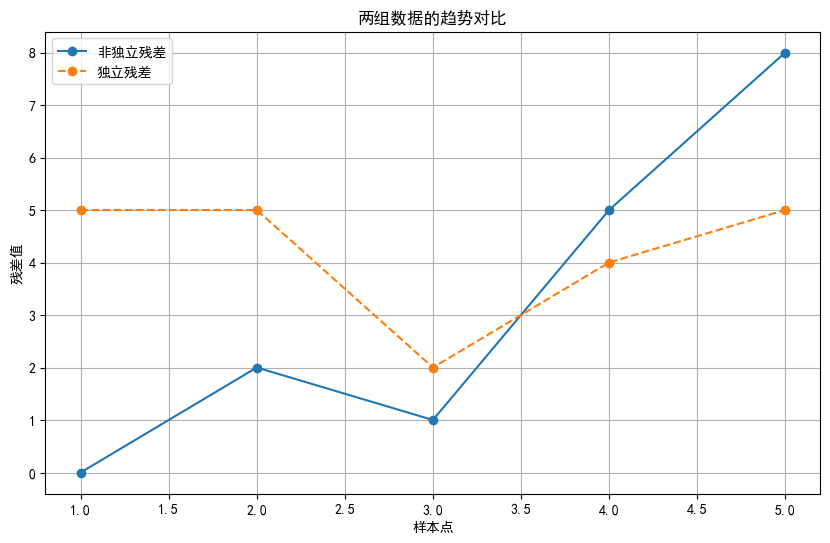

**非独立样本造成的影响**

- 影响一：低估标准误。标准误（standard error）会被低估。导致置信区间变窄，增加假阳性的可能性，即统计显示结果存在显著差异，但实际上没有。
- 影响二：高估统计显著性。p值会变得更小，导致错误地认为变量之间存在显著关系。
- 影响三：模型参数偏差。回归系数等参数估计值会有偏差，导致模型预测不准确。例如，斜率和截距可能不是实际的最佳估计。

**对比表**

| 影响 | 独立样本                               | 不独立样本                           |
|------|----------------------------------------|--------------------------------------|
| 回归系数 \( \beta_1 \) | 5                                      | 5                                    |
| 标准误 \( SE(\beta_1) \) | 0                                      | 2.94                                 |
| p值 | 由于残差为0无法计算，但假设波动时有显著性 | 约为0.09，假设自由度为5-2=3           |

**解释**
1. **标准误**：在独立样本中，标准误为0，这是假设残差完全为0的理想情况。在实际中，有些波动会导致标准误非零，但会比不独立样本的标准误小。不独立样本的标准误更大，反映了样本间的相关性。
2. **p值**：独立样本中假设波动时，p值会显示出显著性；不独立样本中的p值会被低估，可能导致错误地认为变量之间存在显著关系。

通过这些计算和对比，我们可以清楚地看到样本不独立对统计分析结果的影响：标准误增大，p值低估，模型参数估计不准确，从而影响统计推断和决策。

---

### 样本独立性检验

**自变量是连续变量，因变量是连续变量**

| 检验方法              | 解释                                                   | 什么时候用                                               |
|-----------------------|--------------------------------------------------------|---------------------------------------------------------|
| 回归残差分析          | 看看预测结果和实际结果之间的误差有没有固定模式。        | 想确认预测误差是随机的，没有规律的。                         |
| Durbin-Watson 检验    | 检查误差之间有没有前后关联，比如时间上的连续性。         | 有时间顺序的数据，想知道误差是不是前后有关联。                |
| 自相关图（ACF, PACF） | 看数据和它之前的数据有没有关联，找出这种关系。             | 研究时间序列数据时，想看当前数据和之前数据之间的关系。         |

**自变量是连续变量，因变量是类别变量**

| 检验方法                     | 解释                                                   | 什么时候用                                               |
|------------------------------|--------------------------------------------------------|---------------------------------------------------------|
| Logistic 回归残差分析        | 看看分类预测的误差是否正常，比如是不是大部分都预测错了。 | 想确保分类预测误差是正常的，没有什么大问题。                |
| Hosmer-Lemeshow 检验         | 检查分类模型整体效果，看它的预测准确性好不好。             | 想知道分类模型的整体预测效果如何，是否准确。                |

**自变量是类别变量，因变量是连续变量**

| 检验方法         | 解释                                                   | 什么时候用                                               |
|------------------|--------------------------------------------------------|---------------------------------------------------------|
| ANOVA（方差分析）| 比较不同组的平均值，看它们有没有明显的差异。              | 想知道不同组之间的平均值是不是有明显不同。                 |
| 残差分析         | 检查模型的误差，看它们是不是符合假设，比如误差是随机的。   | 在做ANOVA之后，检查模型误差是不是正常的。                   |

**自变量是类别变量，因变量是类别变量**

| 检验方法          | 解释                                                   | 什么时候用                                               |
|-------------------|--------------------------------------------------------|---------------------------------------------------------|
| 卡方检验          | 看两个分类变量之间有没有关系，比如性别和购车意向。         | 样本量大时，想知道两个分类变量之间有没有关系。             |
| Fisher精确检验    | 样本量小的情况下，看两个分类变量之间有没有关系。             | 样本量小于20时，检查两个分类变量之间有没有关系。            |


---

### 1. 自变量是连续变量，因变量是连续变量
1. 回归残差分析
2. Durbin-Watson 检验
3. 自相关图（ACF，PACF）


#### 1. 回归残差分析

**直觉理解**
回归残差分析就是在检查预测结果与实际结果之间的误差（残差）是不是随机的。就像你想知道一个学生的考试成绩是不是因为某个原因波动的，如果发现误差有固定模式（比如持续上升或下降），那说明样本不独立，或者模型可能有问题。

**通俗解释**
如果残差是随机的，那说明我们的模型很好地解释了数据，没有遗漏重要的信息。如果残差有固定的模式，比如一直在某个范围波动，那说明模型可能有问题。

**公式**
对于线性回归模型 $Y = \beta_0 + \beta_1 X + \epsilon$：
- $Y$ 是因变量（实际值）
- $\beta_0$ 是截距
- $\beta_1$ 是斜率
- $X$ 是自变量
- $\epsilon$ 是误差项（残差）

我们关注的是 $\epsilon$ 的分布是否随机。

**适用情况**
- **检查残差是否随机分布**：用来检查回归模型的残差是否随机分布在零线上下。如果残差图中显示出某种模式或趋势，可能表明模型不适用或遗漏了某些自变量。
- **检查残差的正态性**：通过 QQ 图查看残差是否服从正态分布。

**使用建议**
- 在进行线性回归分析后，常规地检查残差的随机性和正态性。



回归残差分析结果:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7356.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.39e-94
Time:                        12:21:26   Log-Likelihood:                 88.744
No. Observations:                 100   AIC:                            -173.5
Df Residuals:                      98   BIC:                            -168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.019      1.14

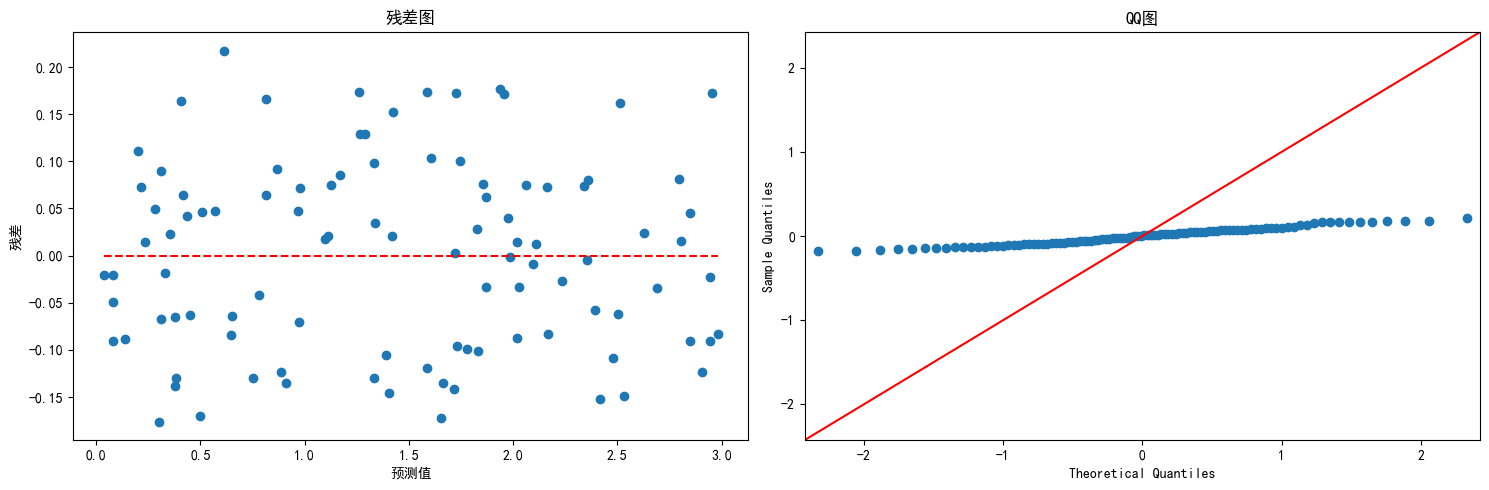

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
rcParams['axes.unicode_minus'] = False    # 解决保存图像时负号 '-' 显示为方块的问题

# 生成数据
np.random.seed(0)
X = np.random.rand(100)
Y = 3 * X + np.random.normal(0, 0.1, 100)

# 回归分析
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# 残差分析
residuals = model.resid

# 打印结果含义和取值范围标准
print("回归残差分析结果:")
print(model.summary())
print("\n残差应随机分布，如果有明显模式，则模型可能不适用。")

# 绘制残差图和QQ图
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 残差图
axes[0].scatter(predictions, residuals)
axes[0].hlines(y=0, xmin=min(predictions), xmax=max(predictions), colors='r', linestyles='--')
axes[0].set_xlabel('预测值')
axes[0].set_ylabel('残差')
axes[0].set_title('残差图')

# QQ图
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('QQ图')

plt.tight_layout()
plt.show()


#### 2. Durbin-Watson 检验

**直觉理解**
Durbin-Watson 检验就像在检查一个人的心跳，如果心跳很有规律，那可能是有问题的。同样地，我们检查回归模型的误差（残差）是不是有规律，如果误差之间有很强的关联，那就可能模型不太好。

**通俗解释**
Durbin-Watson 统计量范围是 $0$ 到 $4$：
- $2$ 表示没有自相关性（误差之间没有关系）
- 小于 $2$ 表示正相关（误差有正向关联）
- 大于 $2$ 表示负相关（误差有反向关联）

**公式**
Durbin-Watson 统计量的公式是：
$$
DW = \frac{\sum_{t=2}^n (e_t - e_{t-1})^2}{\sum_{t=1}^n e_t^2}
$$
- $e_t$ 是第 $t$ 个残差
- $n$ 是样本大小

**适用情况**
- **检测残差的自相关性**：特别是对于时间序列数据，这种检验可以帮助发现残差之间是否存在正相关或负相关。
- **快速评估自相关性**：提供一个简洁的统计量，可以快速判断残差是否存在自相关。

**使用建议**
- 在时间序列分析或任何可能存在残差自相关的回归分析中使用，以检测残差的自相关性。


Durbin-Watson 检验结果:
Durbin-Watson 统计量: 2.0832252321235343
解释：
0-2之间：正相关（误差值前后有关联）
2：没有自相关（误差值前后没有关联）（注意：接近2即可）
2-4之间：负相关（误差值前后有反向关联）


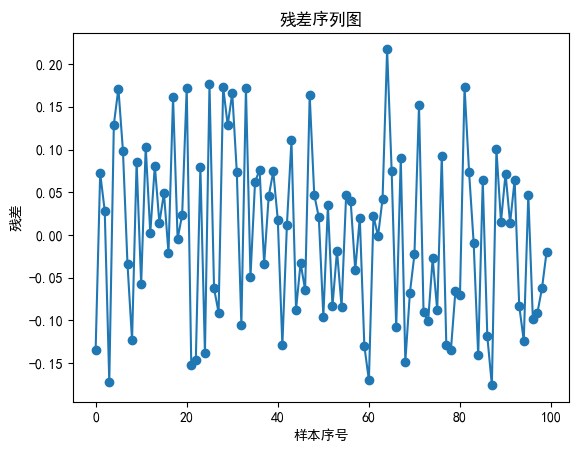

In [23]:
from statsmodels.stats.stattools import durbin_watson

# 计算Durbin-Watson统计量
dw_stat = durbin_watson(residuals)

# 打印结果含义和取值范围标准
print("Durbin-Watson 检验结果:")
print(f"Durbin-Watson 统计量: {dw_stat}")
print("解释：")
print("0-2之间：正相关（误差值前后有关联）")
print("2：没有自相关（误差值前后没有关联）（注意：接近2即可）")
print("2-4之间：负相关（误差值前后有反向关联）")

# 绘制残差序列图
plt.plot(residuals, marker='o')
plt.xlabel('样本序号')
plt.ylabel('残差')
plt.title('残差序列图')
plt.show()



#### 3. 自相关图（ACF, PACF）

**直觉理解**
自相关图（ACF）和偏自相关图（PACF）就像在看一场电影的片段，ACF 看整个电影的片段和过去片段的关系，而 PACF 则看每个片段独立和之前片段的关系。

**通俗解释**
- ACF（自相关函数）显示数据和之前数据的关系。如果当前数据和之前数据有很强的关联，那么 ACF 的值就很高。
- PACF（偏自相关函数）在排除其他时间点的影响后，看某个特定时间点和当前时间点的关系。

**公式**
ACF 的计算公式是：
$$
\rho(k) = \frac{\sum_{t=k+1}^n (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^n (Y_t - \bar{Y})^2}
$$
- $k$ 是滞后期
- $Y_t$ 是第 $t$ 个值
- $\bar{Y}$ 是均值

PACF 是通过递归算法计算的，考虑到每个滞后期的独立影响。

**适用情况**
- **详细查看数据的自相关性**：用于查看时间序列数据在不同滞后期的自相关性（ACF）和在去除其他滞后变量后每个滞后期的自相关性（PACF）。
- **识别时间序列模型的阶数**：帮助确定时间序列模型中需要包含的滞后项。

**使用建议**
- 在时间序列分析中，尤其是需要构建自回归模型（AR模型）或移动平均模型（MA模型）时，使用这些图来确定模型的阶数。

自相关图（ACF, PACF）:
ACF显示数据在不同滞后期的自相关性，PACF显示去除其他滞后变量后每个滞后期的自相关性。
解释：
ACF：看当前值和之前的值（滞后期）的相关性，通常滞后期越长，相关性越低。
PACF：去除其他滞后期的影响，看特定滞后期的相关性，通常用来识别时间序列模型的阶数。


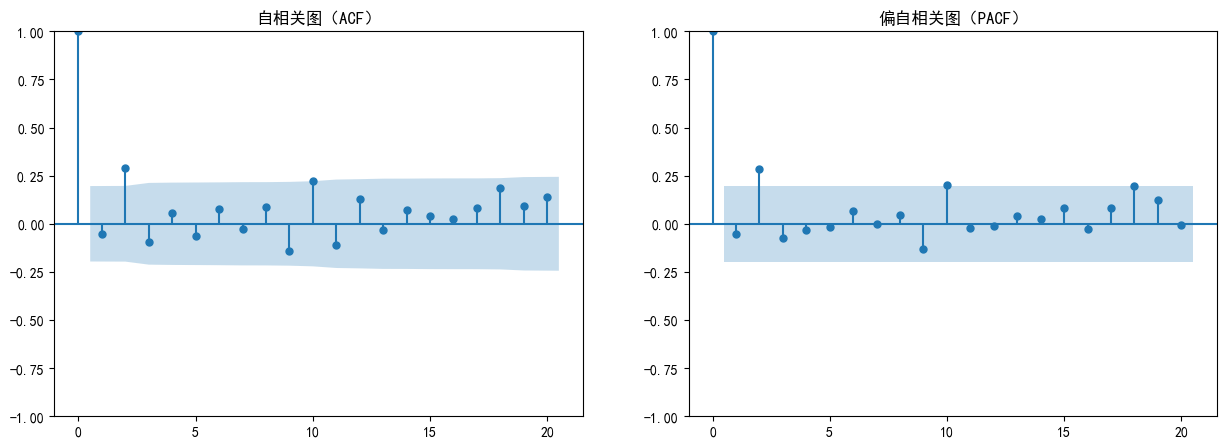

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 打印结果含义和取值范围标准
print("自相关图（ACF, PACF）:")
print("ACF显示数据在不同滞后期的自相关性，PACF显示去除其他滞后变量后每个滞后期的自相关性。")
print("解释：")
print("ACF：看当前值和之前的值（滞后期）的相关性，通常滞后期越长，相关性越低。")
print("PACF：去除其他滞后期的影响，看特定滞后期的相关性，通常用来识别时间序列模型的阶数。")

# 绘制自相关图和偏自相关图
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(Y, lags=20, ax=axes[0])
plot_pacf(Y, lags=20, ax=axes[1])
axes[0].set_title('自相关图（ACF）')
axes[1].set_title('偏自相关图（PACF）')
plt.show()


---

### 2. 自变量是连续变量，因变量是类别变量
#### Logistic 回归残差分析

**直觉理解**：
Logistic回归残差分析是用来检查你的分类预测模型的误差分布是否合理的一种方法。通俗地说，就是看看你的模型预测错得多不多，错得是否有规律。

**通俗解释**：
假设你用模型来预测一个人是否会生病，如果模型经常预测错误，而且错误没有什么规律，比如有时候对健康的人预测错误，有时候对生病的人预测错误，那么这个模型可能不太可靠。

**公式**：
残差 = 实际值 - 预测值
在Logistic回归中，残差一般用对数似然（log-likelihood）来衡量。

**适用情况**：
- 你有一个分类问题，比如预测某个人是否会购买产品。
- 你想确保你的分类预测错误是正常的，没有什么大问题。

**适用建议**：
- 在模型训练和测试阶段都可以使用。
- 如果残差分析结果显示有系统性误差，可能需要重新调整模型。



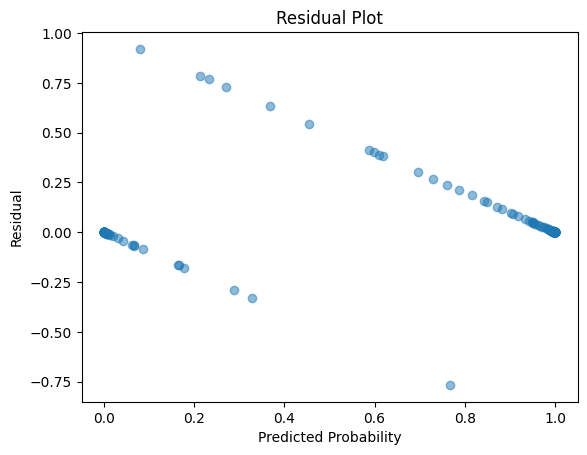

H1:模型的预测误差较大，可能需要改进。


In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 加载数据
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 训练Logistic回归模型
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 预测
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Logistic 回归残差分析
# 残差 = 实际值 - 预测值
residuals = y_test - y_pred_prob

# 画残差图
plt.scatter(y_pred_prob, residuals, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# 判断语句
if any(residuals > 0.5) or any(residuals < -0.5):
    print("H1:模型的预测误差较大，可能需要改进。")
else:
    print("H0:模型的预测误差较小，模型较为可靠。")


#### Hosmer-Lemeshow 检验

**直觉理解**：
Hosmer-Lemeshow检验是用来检查你的分类模型整体效果的工具。简单来说，就是看看你的模型总体预测是否准确。

**通俗解释**：
继续用前面的例子，如果你的模型在预测某个人是否会生病时，总体上预测得很好，那么Hosmer-Lemeshow检验会给出一个好的结果。

**公式**：
Hosmer-Lemeshow检验的计算较为复杂，涉及到将数据分成多个组，然后计算每组的观察值和预测值的差异。

**适用情况**：
- 你已经有一个分类模型，并且想知道它整体的预测效果如何，是否准确。

**适用建议**：
- 通常用于模型验证阶段。
- 如果Hosmer-Lemeshow检验结果不好，说明模型需要改进。


Hosmer-Lemeshow Test Statistic: 3.673678729749239
Hosmer-Lemeshow Test p-value: 0.8853005723288115
H0:模型拟合良好，预测效果较好。


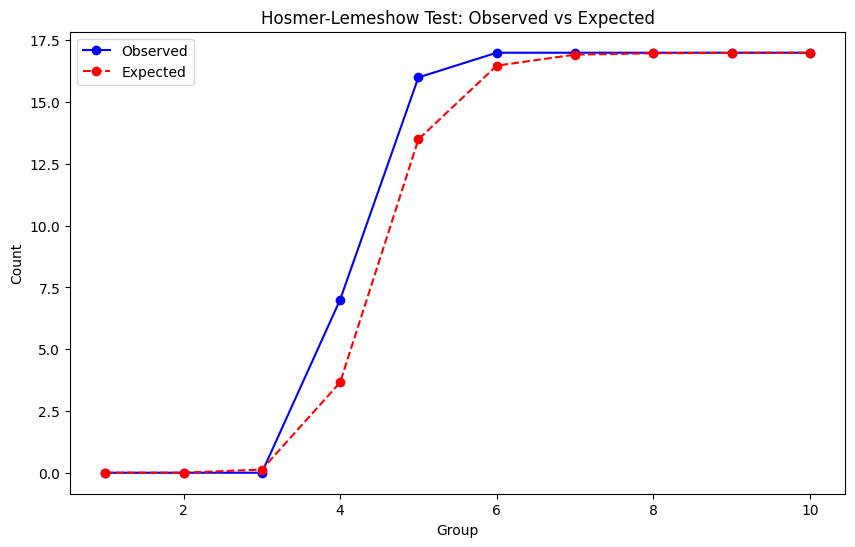

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import matplotlib.pyplot as plt

# 加载数据
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 训练Logistic回归模型
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 预测
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Hosmer-Lemeshow 检验
def hosmer_lemeshow_test(y_true, y_pred, g=10):
    data = pd.DataFrame({'true': y_true, 'pred': y_pred})
    data['group'] = pd.qcut(data['pred'], g, duplicates='drop')
    observed = data.groupby('group', observed=False)['true'].sum()
    expected = data.groupby('group', observed=False)['pred'].sum()
    hl_test_stat = (((observed - expected) ** 2) / expected).sum()
    p_value = 1 - stats.chi2.cdf(hl_test_stat, g - 2)
    return hl_test_stat, p_value, observed, expected

hl_stat, hl_p_value, observed, expected = hosmer_lemeshow_test(y_test, y_pred_prob)
print(f'Hosmer-Lemeshow test Statistic: {hl_stat}')
print(f'Hosmer-Lemeshow test p-value: {hl_p_value}')

# 判断语句
if hl_p_value > 0.05:
    print("H0:模型拟合良好，预测效果较好。")
else:
    print("H1:模型拟合较差，预测效果不理想，需要改进。")

# 绘制实际值与预测值的对比图
groups = range(1, len(observed) + 1)
plt.figure(figsize=(10, 6))
plt.plot(groups, observed, marker='o', linestyle='-', color='b', label='Observed')
plt.plot(groups, expected, marker='o', linestyle='--', color='r', label='Expected')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Hosmer-Lemeshow test: Observed vs Expected')
plt.legend()
plt.show()


---

### 3. 自变量是类别变量，因变量是连续变量
#### ANOVA（方差分析）

**直觉理解**：
ANOVA（方差分析）是一种统计方法，用于比较多个组的平均值是否有显著差异。通俗地说，就是看看不同组之间的平均值有没有显著不同。

**通俗解释**：
假设你有三种不同的肥料，想知道它们对植物生长的效果是否有差异。通过ANOVA分析，你可以确定这三种肥料对植物生长的影响是否显著不同。

**公式**：
$$ F = \frac{\text{组间变异}}{\text{组内变异}} $$
其中，组间变异表示组与组之间的差异，组内变异表示组内数据的差异。

**适用情况**：
- 你有多个组的数据，并且想知道这些组的平均值是否存在显著差异。
- 例如，比较不同治疗方法的效果，不同教学方法的效果等。

**适用建议**：
- 适用于数据服从正态分布且组内方差相等的情况。
- 进行ANOVA之前，应检查数据的正态性和方差齐性。



             sum_sq    df         F    PR(>F)
C(group)  10.737434   2.0  5.268739  0.007951
Residual  58.081616  57.0       NaN       NaN
H1:不同组之间的平均值存在显著差异。


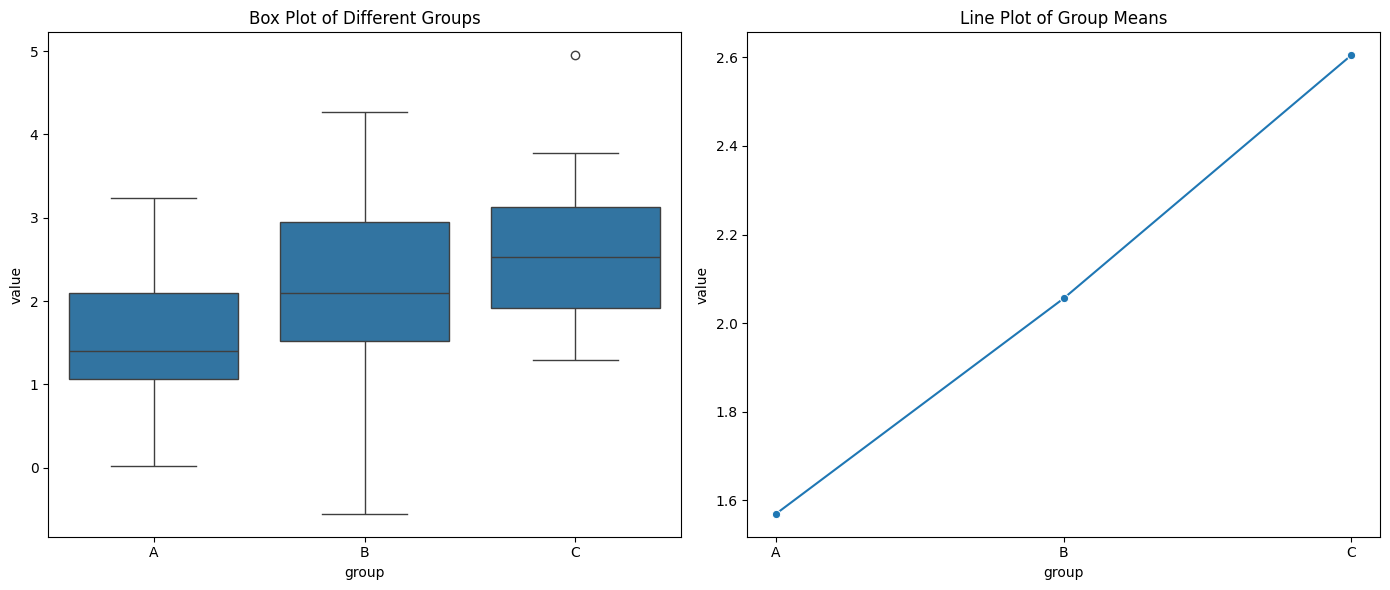

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'value': np.random.randn(60) + np.repeat([1, 2, 3], 20),
    'group': np.repeat(['A', 'B', 'C'], 20)
})

# 进行ANOVA分析
model = ols('value ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 判断语句
p_value = anova_table["PR(>F)"].iloc[0]
if p_value < 0.05:
    print("H1:不同组之间的平均值存在显著差异。")
else:
    print("H0:不同组之间的平均值不存在显著差异。")
    
# 创建一个2x1的图形布局
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 绘制箱型图
sns.boxplot(x='group', y='value', data=data, ax=axes[0])
axes[0].set_title('Box Plot of Different Groups')

# 计算组平均值并绘制折线图
group_means = data.groupby('group')['value'].mean().reset_index()
sns.lineplot(x='group', y='value', data=group_means, marker='o', ax=axes[1])
axes[1].set_title('Line Plot of Group Means')

plt.tight_layout()
plt.show()



#### 残差分析:Shapiro-Wilk检验

**直觉理解**：
残差分析是用来检查模型的误差分布情况，看看它们是否符合假设，比如误差是否随机分布、是否服从正态分布等。

**通俗解释**：
在做完ANOVA之后，你可以通过残差分析来确认模型的误差是否符合假设。例如，如果误差随机且服从正态分布，那么模型的假设是成立的。

**公式**：
残差 = 实际值 - 预测值

**适用情况**：
- 在进行ANOVA分析之后，用于验证模型假设的合理性。
- 例如，检查模型误差是否服从正态分布、是否存在自相关等。

**适用建议**：
- 使用残差图、Q-Q图等方法进行残差分析。
- 如果残差不符合假设，可能需要转换数据或选择其他模型。


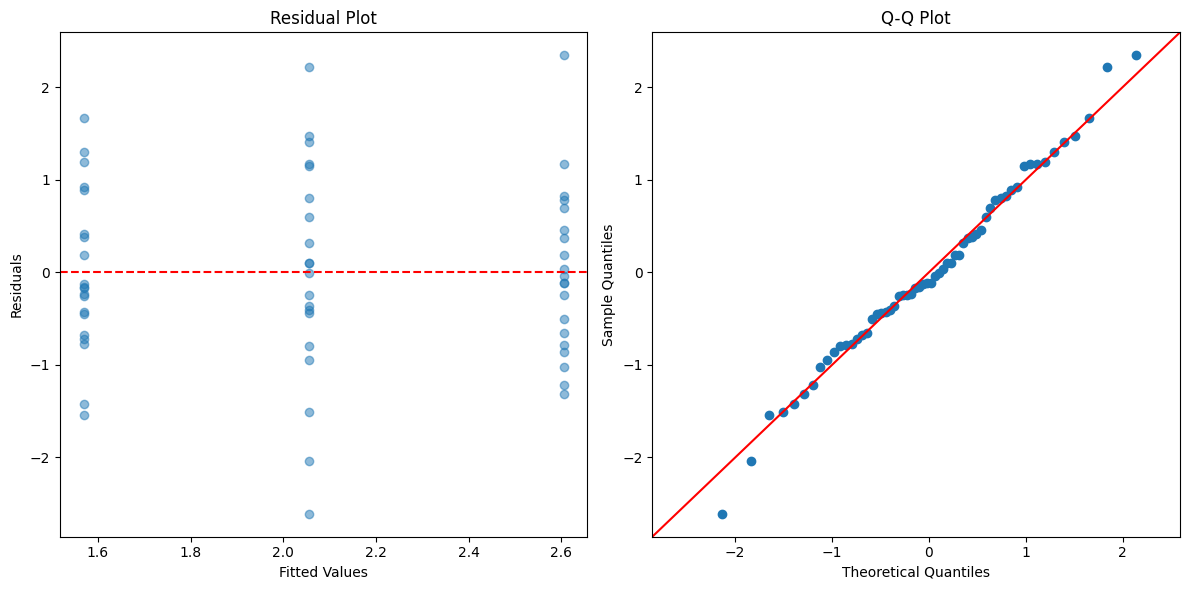

Shapiro-Wilk Test p-value: 0.9732533365454613
H0:残差符合正态分布假设。


In [29]:
# 残差分析:Shapiro-Wilk检验
residuals = model.resid

# 创建一个2x1的图形布局
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 画残差图
axes[0].scatter(model.fittedvalues, residuals, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

# 画Q-Q图
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 判断语句
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
    print("H0:残差符合正态分布假设。")
else:
    print("H1:残差不符合正态分布假设。")


---

### 4. 自变量是类别变量，因变量是类别变量

#### 卡方检验

**直觉理解**：
卡方检验是一种统计方法，用于检验两个分类变量之间是否存在关联。简单来说，就是看看两个分类变量是否有关系。

**通俗解释**：
例如，你想知道性别和购车之间是否有关系。通过卡方检验，你可以判断这两个变量是否相关。

**公式**：
$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$
其中，$ O_i $ 是观察频数，$ E_i $ 是期望频数。

**适用情况**：
- 样本量较大时，适用于检验两个分类变量之间的关系。
- 例如，性别和购车、饮食习惯和健康状况等。

**适用建议**：
- 样本量较大时使用卡方检验。
- 如果样本量较小，使用Fisher精确检验。



Purchase  No  Yes
Gender           
Female    25   31
Male      20   24
Chi2 Statistic: 0.0
p-value: 1.0
H0:性别和购车之间不存在显著关系。


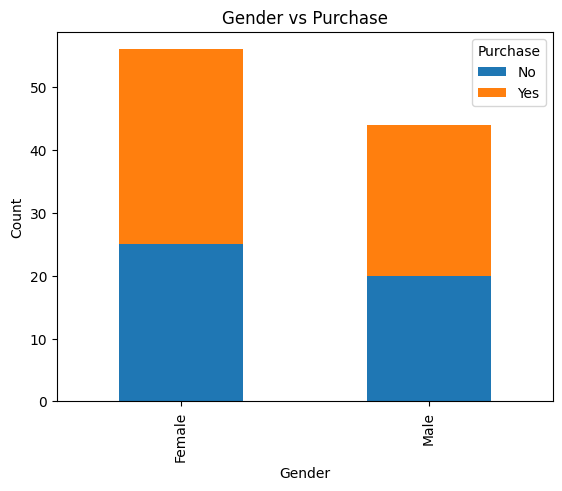

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Purchase': np.random.choice(['Yes', 'No'], size=100)
})

# 创建列联表
contingency_table = pd.crosstab(data['Gender'], data['Purchase'])
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')

# 判断语句
if p < 0.05:
    print("H1:性别和购车之间存在显著关系。")
else:
    print("H0:性别和购车之间不存在显著关系。")

# 可视化列联表
contingency_table.plot(kind='bar', stacked=true)
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchase')
plt.show()



#### Fisher精确检验

**直觉理解**：
Fisher精确检验是一种统计方法，用于检验两个分类变量之间是否存在关联，特别适用于小样本情况。

**通俗解释**：
当样本量较小时（例如，小于20），卡方检验可能不准确，此时使用Fisher精确检验来判断两个分类变量是否有关系。

**公式**：
Fisher精确检验没有固定公式，它是基于样本的排列计算出精确概率。

**适用情况**：
- 样本量较小时，适用于检验两个分类变量之间的关系。
- 例如，小规模实验数据的分析。

**适用建议**：
- 样本量小于20时使用Fisher精确检验。


Purchase  No  Yes
Gender           
Female     7    4
Male       5    4
Odds Ratio: 1.4
p-value: 1.0
H0:性别和购车之间不存在显著关系。


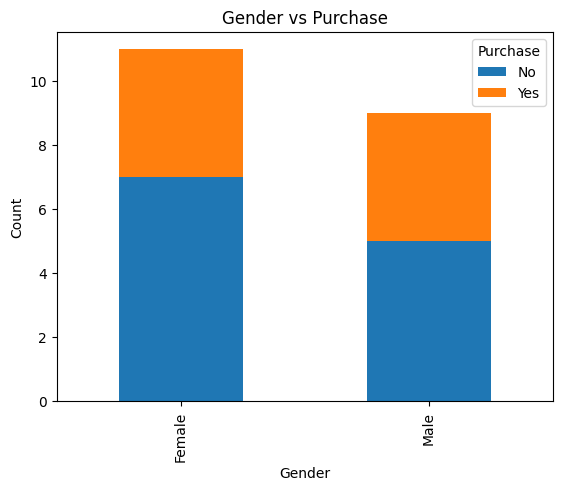

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import seaborn as sns
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=20),
    'Purchase': np.random.choice(['Yes', 'No'], size=20)
})

# 创建列联表
contingency_table = pd.crosstab(data['Gender'], data['Purchase'])
print(contingency_table)

# 进行Fisher精确检验
odds_ratio, p = fisher_exact(contingency_table)
print(f'Odds Ratio: {odds_ratio}')
print(f'p-value: {p}')

# 判断语句
if p < 0.05:
    print("H1:性别和购车之间存在显著关系。")
else:
    print("H0:性别和购车之间不存在显著关系。")

# 可视化列联表
contingency_table.plot(kind='bar', stacked=true)
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchase')
plt.show()


---

## 二、数据方差同质：变量或群组间分散程度接近；用同质性检验

**数据方差同质性**（Homogeneity of Variance），又称为**方差齐性**，是指不同样本组或变量之间的方差相等或接近。

**方差同质性的关键点**

1. **定义**：
   - 方差同质性意味着不同组或不同水平的独立变量之间的方差相等。
   
2. **重要性**：
   - **统计方法的基础**：许多经典统计方法（如ANOVA和线性回归）假设方差齐性。如果这个假设被违反，检验的显著性水平和结果的可靠性可能受到影响。
   - **结果解释的准确性**：方差齐性保证了在各组之间进行比较时，每组的变异程度相似，这有助于更准确地解释和比较结果。

3. **检测方差同质性的方法**：
   - **Levene's Test（莱文检验）**：测试不同组的方差是否相等。它对数据的正态性要求较低，是一种常用的方差同质性检验方法。
   - **Bartlett's Test（巴特利特检验）**：测试不同组的方差是否相等，但对数据的正态性要求较高。
   - **Hartley's F-max Test**：比较组间最大方差与最小方差的比值，用于小样本数据。
   - **图示法**：如残差图，通过直观的方式观察不同组的方差分布。

4. **处理方差齐性假设被违反的方法**：
   - **方差稳定化变换**：如对数变换、平方根变换等，可以使数据方差变得更均匀。
   - **使用稳健的统计方法**：如Welch's ANOVA，在方差不齐时也能提供较为可靠的结果。
   - **非参数检验**：如Kruskal-Wallis检验，不依赖方差齐性假设。

**实例**
假设你在研究不同教学方法对学生成绩的影响，收集了使用不同教学方法的三个班级的学生成绩。如果这三个班级的成绩方差相似，即分散程度相近，那么可以认为数据满足方差齐性假设，可以使用ANOVA进行分析。

---

### 方差同质性检验

**自变量是连续变量，因变量是连续变量**

| 检验方法        | 解释                                                     | 什么时候用                                     |
|----------------|--------------------------------------------------------|-----------------------------------------------|
| Levene 检验     | 测试两个或多个组的方差是否相等，不依赖于数据的正态性。    | 当你有多个组的数据，并且想比较它们的方差时。     |
| Bartlett 检验   | 检验多个正态分布样本的方差是否相等，对数据的正态性要求较高。 | 当你有多个组的正态分布数据，并且想比较它们的方差时。 |

**自变量是连续变量，因变量是类别变量**

| 检验方法        | 解释                                                     | 什么时候用                                     |
|----------------|--------------------------------------------------------|-----------------------------------------------|
| Levene 检验     | 测试两个或多个组的方差是否相等，不依赖于数据的正态性。    | 当你有多个组的连续变量数据，并且想比较它们的方差时。 |
| Bartlett 检验   | 检验多个正态分布样本的方差是否相等，对数据的正态性要求较高。 | 当你有多个组的正态分布数据，并且想比较它们的方差时。 |

**自变量是类别变量，因变量是连续变量**

| 检验方法        | 解释                                                     | 什么时候用                                     |
|----------------|--------------------------------------------------------|-----------------------------------------------|
| Levene 检验     | 测试两个或多个组的方差是否相等，不依赖于数据的正态性。    | 当你有多个组的数据，并且想比较它们的方差时。     |
| Bartlett 检验   | 检验多个正态分布样本的方差是否相等，对数据的正态性要求较高。 | 当你有多个组的正态分布数据，并且想比较它们的方差时。 |

**自变量是类别变量，因变量是类别变量**

| 检验方法              | 解释                                                           | 什么时候用                                    |
|----------------------|--------------------------------------------------------------|----------------------------------------------|
| 卡方检验（Chi-Square Test）  | 检验两个类别变量之间是否存在关联，间接比较方差。                       | 当你有两个类别变量，并且想比较它们之间的关联性时。  |
| Fisher精确检验         | 在样本量较小时检验两个类别变量之间是否存在关联，间接比较方差。                | 当样本量小于20时，检验两个类别变量之间的关系。   |


---


**Levene's Test（Levene检验）**:
   $$ W = \frac{(N - k)}{(k - 1)} \cdot \frac{\sum_{i=1}^{k} N_i (Z_{i\cdot} - Z_{\cdot\cdot})^2}{\sum_{i=1}^{k} \sum_{j=1}^{N_i} (Z_{ij} - Z_{i\cdot})^2} $$
   其中，$Z_{ij} = |Y_{ij} - \tilde{Y}_i|$，$ \tilde{Y}_i $ 是第 $i$ 组的中位数。

**适用情况**
**Levene's Test**:
   - 样本量较大或较小均适用。
   - 数据不需要服从正态分布。
   - 适用于各种类型的数据。

**适用建议**
使用Levene检验，如果数据不服从正态分布或者你不确定数据的分布情况。



Levene 检验统计量: 14.400804191740455, p值: 1.0734429447018211e-06
方差同质性假设不成立 (H1)。


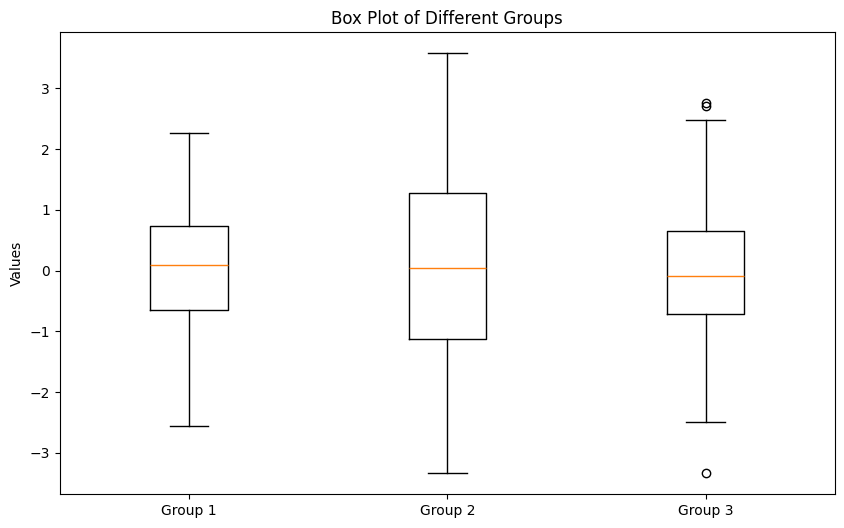

In [36]:
import numpy as np
from scipy.stats import levene
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(0)
group1 = np.random.normal(0, 1, 100)
group2 = np.random.normal(0, 1.5, 100)
group3 = np.random.normal(0, 1.2, 100)

# Levene 检验
stat, p_value = levene(group1, group2, group3)
print(f'Levene 检验统计量: {stat}, p值: {p_value}')

# 判断语句
if p_value > 0.05:
    print("方差同质性假设成立 (H0)。")
else:
    print("方差同质性假设不成立 (H1)。")

# 画图
data = [group1, group2, group3]
plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot of Different Groups')
plt.ylabel('Values')
plt.show()



**Bartlett's Test（Bartlett检验）**:
   $$ \chi^2 = \left( \frac{2.303}{C} \right) \left( \sum (N_i - 1) \log(S_i^2) - \sum (N_i - 1) \log(S_p^2) \right) $$
   其中，$C = 1 + \frac{1}{3(k - 1)} \left( \sum \frac{1}{N_i - 1} - \frac{1}{N - k} \right)$，$S_i^2$ 是第 $i$ 组的样本方差，$S_p^2$ 是总体样本方差。

**适用情况**

**Bartlett's Test**:
   - 样本量较大时适用。
   - 数据需要服从正态分布。
   - 适用于正态分布的数据。

**适用建议**
使用Bartlett检验，如果你确定数据服从正态分布且样本量较大。


Bartlett 检验统计量: 20.168380057550507, p值: 4.173418299889246e-05
方差同质性假设不成立 (H1)。


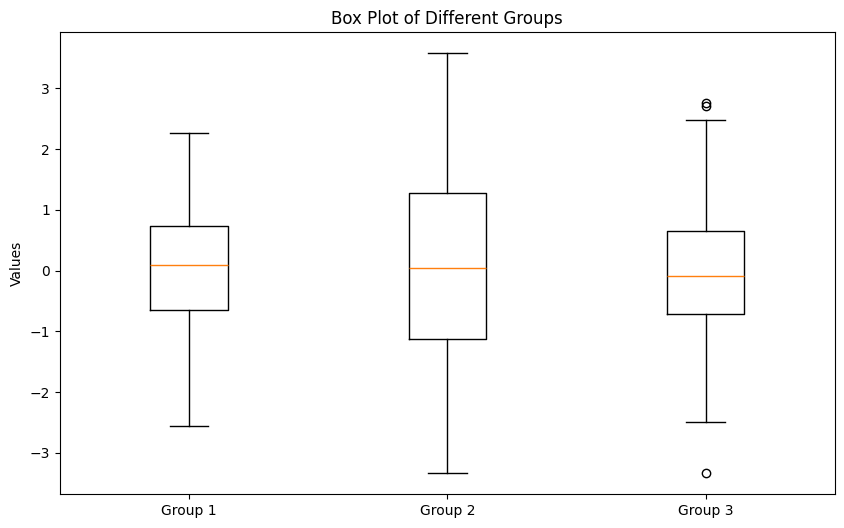

In [37]:
from scipy.stats import bartlett
import matplotlib.pyplot as plt

# Bartlett 检验
stat, p_value = bartlett(group1, group2, group3)
print(f'Bartlett 检验统计量: {stat}, p值: {p_value}')

# 判断语句
if p_value > 0.05:
    print("方差同质性假设成立 (H0)。")
else:
    print("方差同质性假设不成立 (H1)。")

# 画图
data = [group1, group2, group3]
plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot of Different Groups')
plt.ylabel('Values')
plt.show()


---

Purchase  No  Yes
Gender           
Female    25   31
Male      20   24
卡方检验统计量: 0.0, p值: 1.0
类别变量独立，方差同质性假设成立 (H0)。


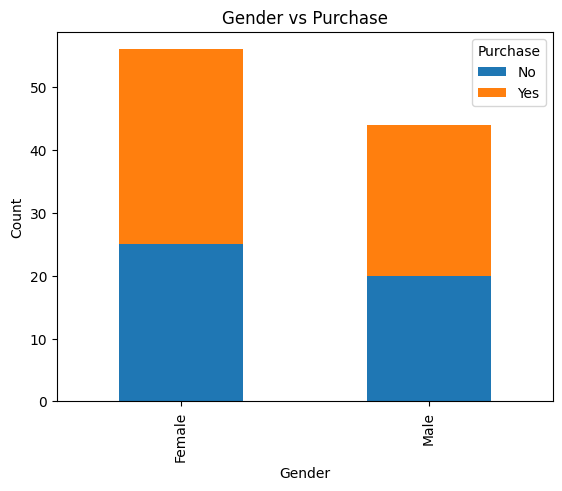

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Purchase': np.random.choice(['Yes', 'No'], size=100)
})

# 创建列联表
contingency_table = pd.crosstab(data['Gender'], data['Purchase'])
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'卡方检验统计量: {chi2}, p值: {p}')

# 判断语句
if p > 0.05:
    print("类别变量独立，方差同质性假设成立 (H0)。")
else:
    print("类别变量不独立，方差同质性假设不成立 (H1)。")

# 可视化列联表
contingency_table.plot(kind='bar', stacked=true)
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchase')
plt.show()


Purchase  No  Yes
Gender           
Female     7    4
Male       5    4
Odds Ratio: 1.4, p值: 1.0
类别变量独立，方差同质性假设成立 (H0)。


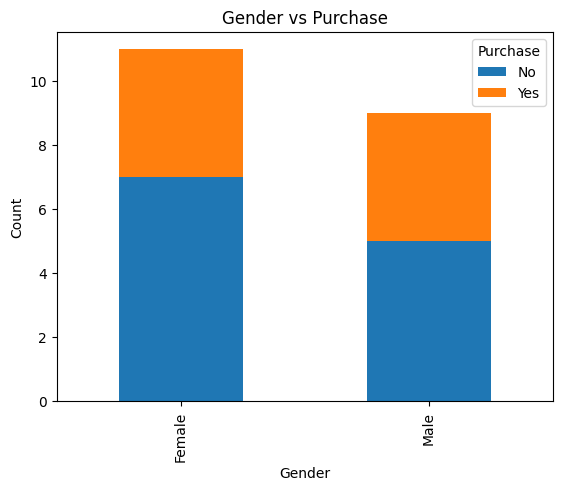

In [40]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import seaborn as sns
import matplotlib.pyplot as plt

# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=20),
    'Purchase': np.random.choice(['Yes', 'No'], size=20)
})

# 创建列联表
contingency_table = pd.crosstab(data['Gender'], data['Purchase'])
print(contingency_table)

# 进行Fisher精确检验
odds_ratio, p = fisher_exact(contingency_table)
print(f'Odds Ratio: {odds_ratio}, p值: {p}')

# 判断语句
if p > 0.05:
    print("类别变量独立，方差同质性假设成立 (H0)。")
else:
    print("类别变量不独立，方差同质性假设不成立 (H1)。")

# 可视化列联表
contingency_table.plot(kind='bar', stacked=true)
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchase')
plt.show()


---

## 三、数据正态分布：符合钟型图；用偏度和峰度检验

**正态性检验的标准**

| **指标** | **分类** | **描述** |
| --- | --- | --- |
| **偏度（Skewness）** | 数据分布的不对称性 | |
| **严重偏斜分布** | 1 < 偏度系数 或 偏度系数 < -1 | |
| **中度偏斜分布** | 0.5 < 偏度系数 < 1 或 -1 < 偏度系数 < -0.5 | |
| **轻微偏斜分布** | 0 < 偏度系数 < 0.5 或 -0.5 < 偏度系数 < 0 | |
| **负值** | 左偏分布（左长尾） | |
| **正值** | 右偏分布（右长尾） | |
| **峰度（Kurtosis）** | 数据分布的峰值高低 | |
| **非正态分布参考值** | 偏度 > 1；峰度 > 7 | |
| **标准正态分布** | 偏度 = 0；峰度 = 0 | |

---


### 偏度（Skewness）

偏度衡量的是数据分布偏离对称中心（均值）的程度。通过偏度公式，我们可以了解数据是向左偏（负偏）还是向右偏（正偏），以及这种偏斜的程度。

#### 偏度公式：
样本偏度的公式为：
$$
\text{Skewness} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

- $n$：样本数量
- $x_i$：第 $i$ 个样本值
- $\bar{x}$：样本均值
- $s$：样本标准差

简化的公式（使用统计软件）为：
$$
\text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

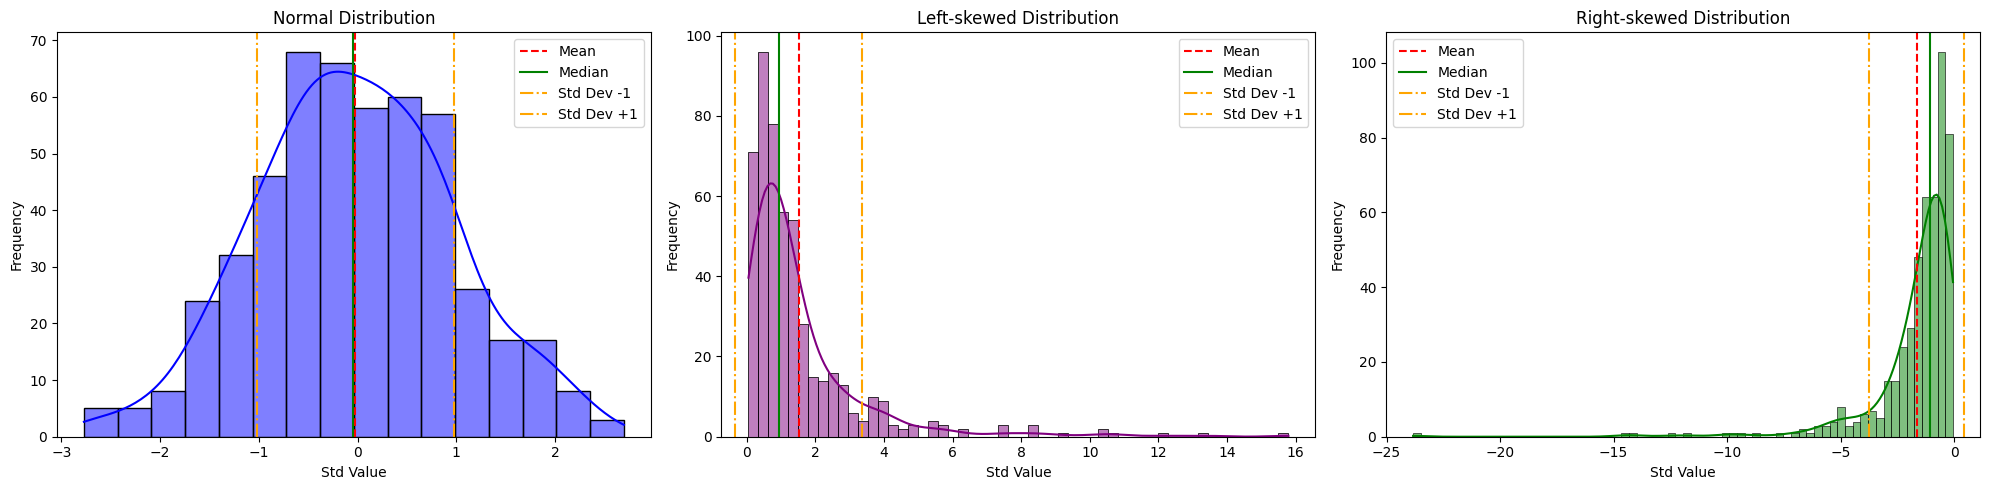

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=500)
data_left_skewed = np.random.lognormal(mean=0, sigma=1, size=500)
data_right_skewed = -np.random.lognormal(mean=0, sigma=1, size=500)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# normal distribution
sns.histplot(data_normal, kde=true, ax=axes[0], color='blue')
axes[0].axvline(np.mean(data_normal), color='red', linestyle='--', label='Mean')
axes[0].axvline(np.median(data_normal), color='green', linestyle='-', label='Median')
axes[0].axvline(np.mean(data_normal) - np.std(data_normal), color='orange', linestyle='-.', label='Std Dev -1')
axes[0].axvline(np.mean(data_normal) + np.std(data_normal), color='orange', linestyle='-.', label='Std Dev +1')
axes[0].set_title('Normal Distribution')
axes[0].set_xlabel('Std Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Left-skewed distribution
sns.histplot(data_left_skewed, kde=true, ax=axes[1], color='purple')
axes[1].axvline(np.mean(data_left_skewed), color='red', linestyle='--', label='Mean')
axes[1].axvline(np.median(data_left_skewed), color='green', linestyle='-', label='Median')
axes[1].axvline(np.mean(data_left_skewed) - np.std(data_left_skewed), color='orange', linestyle='-.', label='Std Dev -1')
axes[1].axvline(np.mean(data_left_skewed) + np.std(data_left_skewed), color='orange', linestyle='-.', label='Std Dev +1')
axes[1].set_title('Left-skewed Distribution')
axes[1].set_xlabel('Std Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Right-skewed distribution
sns.histplot(data_right_skewed, kde=true, ax=axes[2], color='green')
axes[2].axvline(np.mean(data_right_skewed), color='red', linestyle='--', label='Mean')
axes[2].axvline(np.median(data_right_skewed), color='green', linestyle='-', label='Median')
axes[2].axvline(np.mean(data_right_skewed) - np.std(data_right_skewed), color='orange', linestyle='-.', label='Std Dev -1')
axes[2].axvline(np.mean(data_right_skewed) + np.std(data_right_skewed), color='orange', linestyle='-.', label='Std Dev +1')
axes[2].set_title('Right-skewed Distribution')
axes[2].set_xlabel('Std Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()


---

##### 偏度计算步骤：
1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。
2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。
3. **标准化（Z分数） $z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。
4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。
5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。

###### 举例

假设我们有以下数据集：
$$ 6, 8, 10, 12, 14 $$



### 1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

**参数：**
- $ \bar{x} $: 均值
- $ n $: 数据点的数量
- $ x_i $: 第 $ i $ 个数据点
- $ n $: 数据点的数量

$$ \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10 $$


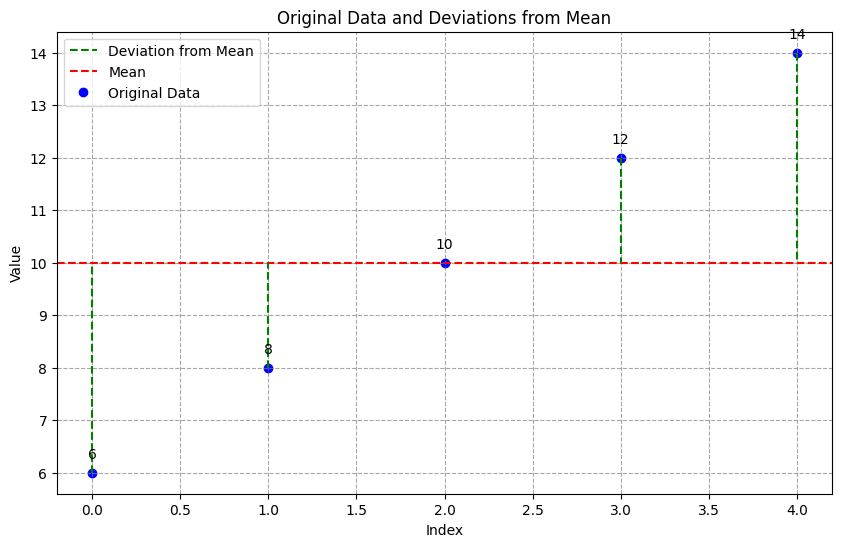

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 绘制原始数据的散点图和偏差线
fig, ax = plt.subplots(figsize=(10, 6))

# 原始数据点
ax.scatter(range(len(data)), data, color='blue', label='Original Data')
for i, txt in enumerate(data):
    ax.annotate(txt, (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 均值线
ax.axhline(mean, color='red', linestyle='--', label='Mean')

# 每个点到均值的距离（偏差）
for i in range(len(data)):
    ax.plot([i, i], [data[i], mean], color='green', linestyle='--')

# 添加绿色虚线标记
import matplotlib.lines as mlines
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Deviation from Mean')
ax.legend(handles=[green_line, mlines.Line2D([], [], color='red', linestyle='--', label='Mean'), 
                   mlines.Line2D([], [], color='blue', marker='o', linestyle='none', label='Original Data')])

ax.set_title('Original Data and Deviations from Mean')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

ax.grid(true, linestyle='--', color='grey', alpha=0.7)

plt.show()


---


### 标准差公式 (Standard Deviation Formula)
对于样本数据（Sample Standard Deviation）：
$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

对于总体数据（Population Standard Deviation）：
$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

**参数：**
- $ \sigma $: 总体标准差
- $ \bar{x} $: 样本均值
- $ \mu $: 总体均值
- $ n $: 数据点的数量


### 2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

$$ s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5 - 1}} = 3.16 $$

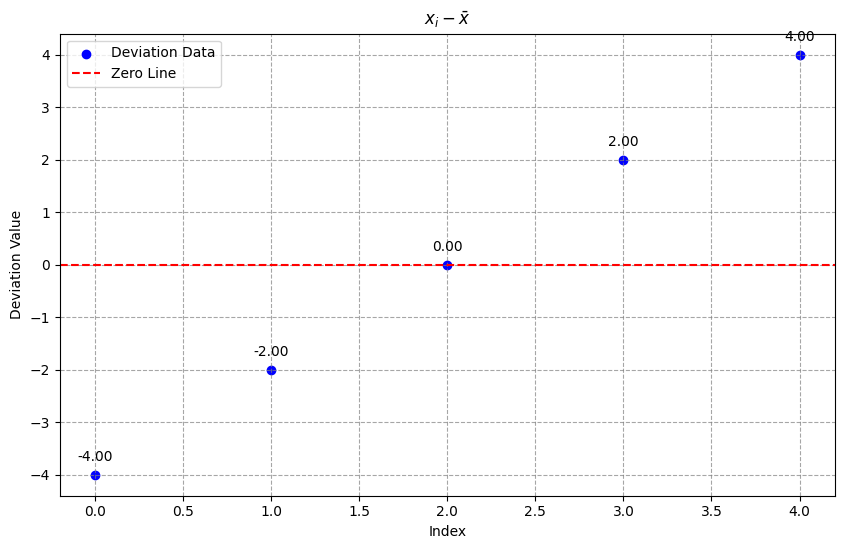

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 每个值减去均值后的数据
deviation_data = [x - mean for x in data]

# 绘制新数据的散点图和零线
fig, ax = plt.subplots(figsize=(10, 6))

# 新数据点
ax.scatter(range(len(deviation_data)), deviation_data, color='blue', label='Deviation Data')
for i, txt in enumerate(deviation_data):
    ax.annotate(f'{txt:.2f}', (i, deviation_data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 零线
ax.axhline(0, color='red', linestyle='--', label='zero Line')

# 添加图例
ax.legend()

ax.set_title(r'$ x_i - \bar{x} $')
ax.set_xlabel('Index')
ax.set_ylabel('Deviation Value')

ax.grid(true, linestyle='--', color='grey', alpha=0.7)

plt.show()


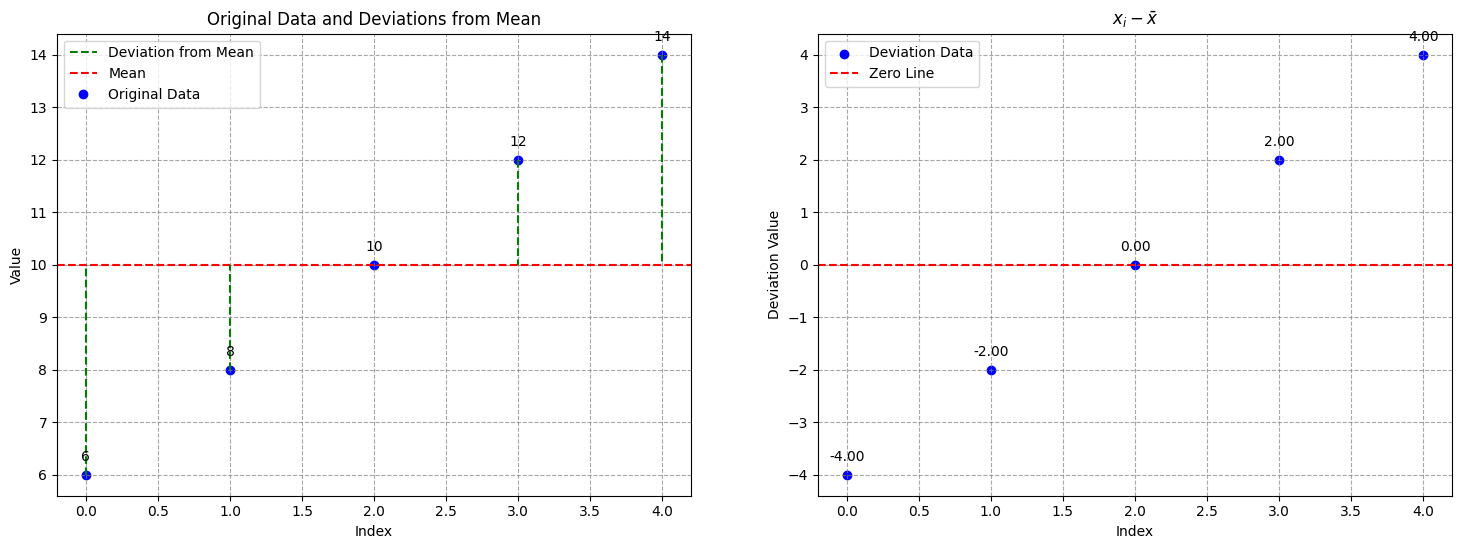

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# 原始数据
data = [6, 8, 10, 12, 14]
mean = sum(data) / len(data)

# 每个值减去均值后的数据
deviation_data = [x - mean for x in data]

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 绘制原始数据的散点图和偏差线
# 原始数据点
ax1.scatter(range(len(data)), data, color='blue', label='Original Data')
for i, txt in enumerate(data):
    ax1.annotate(txt, (i, data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 均值线
ax1.axhline(mean, color='red', linestyle='--', label='Mean')

# 每个点到均值的距离（偏差）
for i in range(len(data)):
    ax1.plot([i, i], [data[i], mean], color='green', linestyle='--')

# 添加绿色虚线标记
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Deviation from Mean')
ax1.legend(handles=[green_line, mlines.Line2D([], [], color='red', linestyle='--', label='Mean'), 
                    mlines.Line2D([], [], color='blue', marker='o', linestyle='none', label='Original Data')])

ax1.set_title('Original Data and Deviations from Mean')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.grid(true, linestyle='--', color='grey', alpha=0.7)

# 绘制新数据的散点图和零线
# 新数据点
ax2.scatter(range(len(deviation_data)), deviation_data, color='blue', label='Deviation Data')
for i, txt in enumerate(deviation_data):
    ax2.annotate(f'{txt:.2f}', (i, deviation_data[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 零线
ax2.axhline(0, color='red', linestyle='--', label='zero Line')

# 添加图例
ax2.legend()

ax2.set_title(r'$ x_i - \bar{x} $')
ax2.set_xlabel('Index')
ax2.set_ylabel('Deviation Value')
ax2.grid(true, linestyle='--', color='grey', alpha=0.7)

plt.show()


$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

**参数：**
- $ s $: 样本标准差
- $ x_i $: 第 $ i $ 个数据点
- $ \bar{x} $: 样本均值
- $ n $: 数据点的数量

$$ s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5 - 1}} = 3.16 $$

### 标准化的步骤

- 至此，我们学会了使用去均值化将数据平移至以0为中心位置。
- 随后，将其平方以消除正负号的影响。
- 除以自由度以实现无偏估计。
- 最后，开根号以还原数据。
- 得到标准差。即，每个点消除正负号后，每个数据离中心点的平均距离。


### 为什么样本标准差要-1？
- 因为参数估计需要独立样本。
- 根据贝塞尔校正（减1）提供了一个让样本标准差更贴近总体标准差的方法。
- 因为，样本数据中只有n-1个数据是独立的，即 $自由度 = n - 1$

- 如果是总体的话，那么每个样本都是独立的，那么自由度就是n。
- 如果是抽样的话，那么前 $ n-1 $ 个数据点与均值的差值确认以后，第 $ n $ 个数据点的差值是可以确定的。因为所有这些差值的总和必须为0。这是因为均值是所有数据点的平均值。
- 因此，样本标准差的独立样本就是$ n-1 $个。


### 3. **标准化（Z分数） $ z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。

   $$ \frac{x_i - \bar{x}}{s} $$

- 将每个中心化后的数据点除以样本标准差 \( s \)，这一步是为了将不同数据集的偏度进行可比性。标准化后，数据点的单位变为标准差单位，这样不同的数据集可以用同样的尺度来衡量其偏离程度。
- 标准化的目的是将数据转换到一个通用尺度（均值为0，标准差为1）

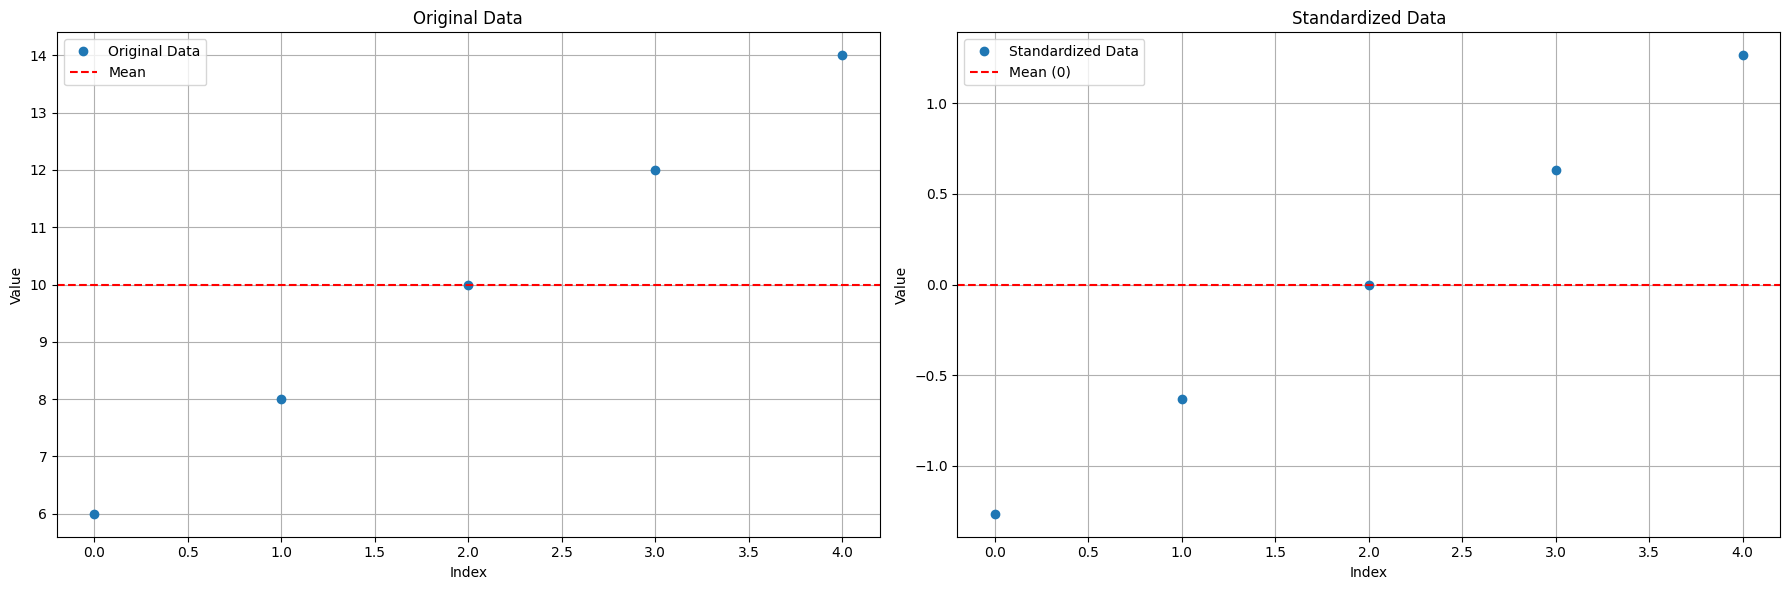

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
data = [6, 8, 10, 12, 14]

# 计算均值和标准差
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # 样本标准差，ddof=1

# 标准化数据（z-scores）
standardized_data = [(x - mean) / std_dev for x in data]

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 原始数据图
ax1.plot(data, 'o', label='Original Data')
ax1.axhline(y=mean, color='r', linestyle='--', label='Mean')
ax1.set_title('Original Data')
ax1.legend()

# 标准化数据图
ax2.plot(standardized_data, 'o', label='Standardized Data')
ax2.axhline(y=0, color='r', linestyle='--', label='Mean (0)')
ax2.set_title('Standardized Data')
ax2.legend()

# 添加标签和网格
for ax in (ax1, ax2):
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.grid(true)

plt.tight_layout()
plt.show()


### 4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。

$$ ( \frac{x_i - \bar{x}}{s} )^3 $$

如果在计算偏度时不对每个标准化后的差值进行立方，会导致无法正确捕捉和反映数据分布的不对称性。具体来说，不进行立方会导致以下问题：

### 问题分析

1. **对称性无法区分**：
   - 数据分布的对称性无法正确反映。例如，正偏差和负偏差会相互抵消，使得计算结果无法显示数据的真实偏斜程度。

2. **偏差方向无法区分**：
   - 无法区分左偏和右偏的数据分布。偏度的符号（正负）是通过立方运算得到的，没有立方运算，偏度的正负将不再能指示数据分布的方向（左偏或右偏）。

### 具体例子

假设我们有一个简单的数据集：

$$ \{2, 3, 4, 5, 20\} $$

计算步骤如下：

1. **计算均值 \(\bar{x}\)**：

$$ \bar{x} = \frac{2 + 3 + 4 + 5 + 20}{5} = 6.8 $$

2. **计算样本标准差 \( s \)**：

$$ s = \sqrt{\frac{(2-6.8)^2 + (3-6.8)^2 + (4-6.8)^2 + (5-6.8)^2 + (20-6.8)^2}{5-1}} = \sqrt{\frac{(4.8)^2 + (3.8)^2 + (2.8)^2 + (1.8)^2 + (13.2)^2}{4}} = \sqrt{49.7} \approx 7.05 $$

3. **计算每个数据点减去均值并除以标准差**：

$$ \frac{2-6.8}{7.05} \approx -0.68 $$
$$ \frac{3-6.8}{7.05} \approx -0.54 $$
$$ \frac{4-6.8}{7.05} \approx -0.40 $$
$$ \frac{5-6.8}{7.05} \approx -0.26 $$
$$ \frac{20-6.8}{7.05} \approx 1.87 $$

### 不立方的计算
4. **不进行立方运算，直接求平均值**：

$$ \text{Not Cubed} = \frac{1}{5} \left( -0.68 + (-0.54) + (-0.40) + (-0.26) + 1.87 \right) = \frac{1}{5} (0) = 0 $$

结果为0，这表明数据是对称的，但实际上数据并不对称。20是一个极端值，导致数据的分布偏右（右偏）。

### 立方后的计算

1. **对标准化后的值进行立方**：

$$ (-0.68)^3 \approx -0.31 $$
$$ (-0.54)^3 \approx -0.16 $$
$$ (-0.40)^3 \approx -0.06 $$
$$ (-0.26)^3 \approx -0.02 $$
$$ (1.87)^3 \approx 6.54 $$

2. **求立方后的平均值**：

$$ \text{Skewness} = \frac{1}{5} \left( -0.31 + (-0.16) + (-0.06) + (-0.02) + 6.54 \right) = \frac{1}{5} (6.00) = 1.20 $$

结果为正值，表明数据是右偏的，反映了20这个极端值的影响。

### 总结

通过以上例子可以看到，不进行立方运算时，偏度的计算结果可能无法正确反映数据分布的偏斜程度。而立方运算能放大正负偏差，使得偏度的正负能够正确指示数据分布的方向（左偏或右偏）。这就是为什么在计算偏度时要对每个标准化后的差值进行立方运算的原因。

---

### 5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。


$$ \text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3 $$

最后，让我们一步一步用数据 \([6, 8, 10, 12, 14]\) 计算偏度。

### 计算步骤

1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。

   $$
   \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$
   其中，$n = 5$，$x_i$ 是数据点。
   $$
   \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10
   $$

2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。

   $$
   s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   其中，$n = 5$，$x_i$ 是数据点，$\bar{x} = 10$。
   $$
   s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5-1}} = \sqrt{\frac{16 + 4 + 0 + 4 + 16}{4}} = \sqrt{10} \approx 3.16
   $$

3. **标准化（Z分数） $z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。

   $$
   z_i = \frac{x_i - \bar{x}}{s}
   $$
   其中，$x_i$ 是数据点，$\bar{x} = 10$，$s \approx 3.16$。
   $$
   z_1 = \frac{6 - 10}{3.16} \approx -1.27
   $$
   $$
   z_2 = \frac{8 - 10}{3.16} \approx -0.63
   $$
   $$
   z_3 = \frac{10 - 10}{3.16} = 0
   $$
   $$
   z_4 = \frac{12 - 10}{3.16} \approx 0.63
   $$
   $$
   z_5 = \frac{14 - 10}{3.16} \approx 1.27
   $$

4. **立方保留符号，扩大观测效果 $(\frac{x_i - \bar{x}}{s})^3$**：计算偏差的三次方，保留正负号，并放大偏差，便于观察分布的偏斜方向和程度。

   $$
   z_i^3 = \left( \frac{x_i - \bar{x}}{s} \right)^3
   $$
   其中，$z_i$ 是标准化后的值。
   $$
   z_1^3 \approx (-1.27)^3 \approx -2.05
   $$
   $$
   z_2^3 \approx (-0.63)^3 \approx -0.25
   $$
   $$
   z_3^3 = 0^3 = 0
   $$
   $$
   z_4^3 \approx (0.63)^3 \approx 0.25
   $$
   $$
   z_5^3 \approx (1.27)^3 \approx 2.05
   $$

5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$**：计算所有标准化偏差三次方的平均值，以反映整体分布的偏斜程度。

   $$
   \text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} z_i^3 = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
   $$
   其中，$n = 5$。
   $$
   \text{Skewness} = \frac{1}{5} \sum_{i=1}^{5} z_i^3 = \frac{1}{5} \left( -2.05 + (-0.25) + 0 + 0.25 + 2.05 \right) = \frac{1}{5} (0) = 0
   $$

### 结果

偏度（Skewness）为 0。这表明数据分布是对称的，即数据在均值的两侧分布均匀。
   - 正偏度（右偏）：右尾较长，数据集中在左边。
   - 负偏度（左偏）：左尾较长，数据集中在右边。


---


### 峰度（Kurtosis）
峰度度量分布的尖峰程度。正峰度表示分布比正态分布尖锐，负峰度表示分布比正态分布平坦。

#### 峰度公式：
样本峰度的公式为：
$$
\text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

- $n$：样本数量
- $x_i$：第 $i$ 个样本值
- $\bar{x}$：样本均值
- $s$：样本标准差

简化的公式（使用统计软件）为：
$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3
$$

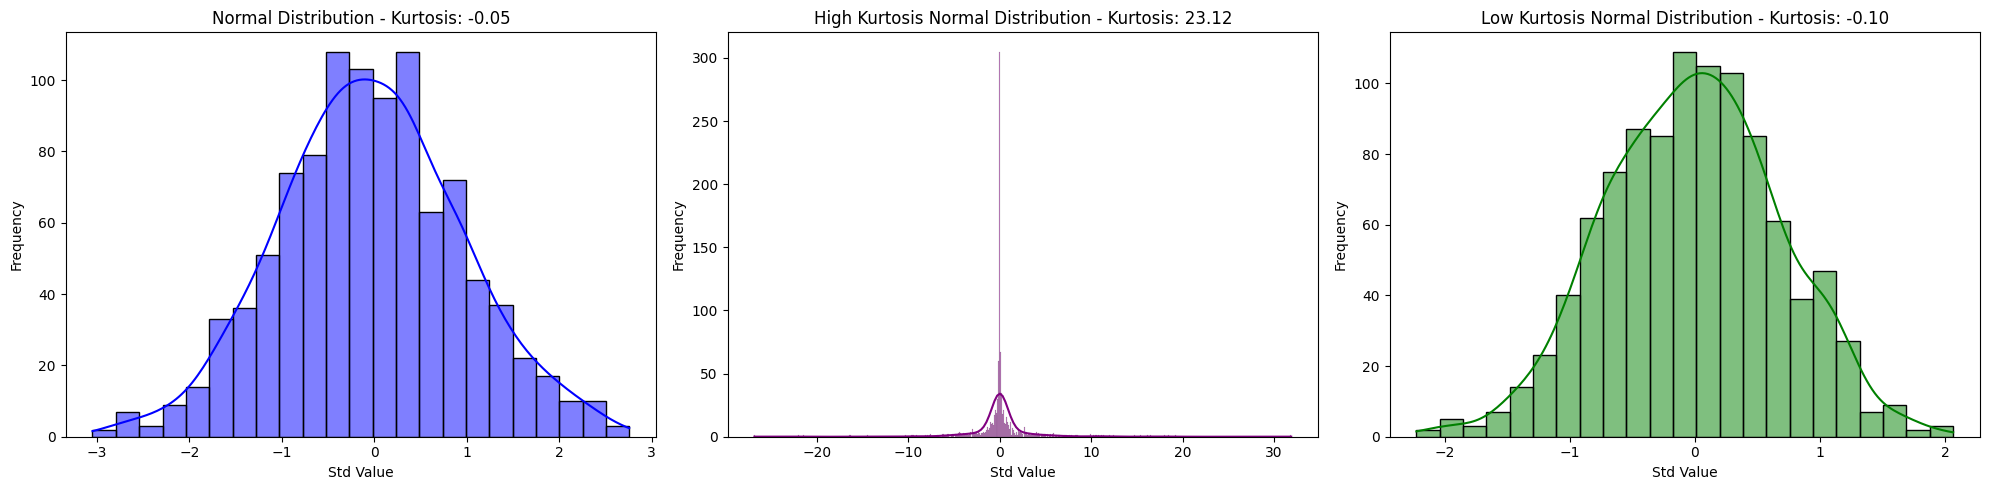

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Generate normal distribution data
np.random.seed(0)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Generate data with different kurtosis based on standard normal distribution
data_high_kurtosis_normal = np.random.normal(loc=0, scale=1, size=1000) ** 3  # Increase kurtosis by cubing the data
data_low_kurtosis_normal = (np.random.normal(loc=0, scale=1, size=1000) - np.random.normal(loc=0, scale=1, size=1000)) / 2  # Decrease kurtosis

# Calculate kurtosis for new data
kurt_normal = kurtosis(data_normal)
kurt_high_normal = kurtosis(data_high_kurtosis_normal)
kurt_low_normal = kurtosis(data_low_kurtosis_normal)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Normal distribution
sns.histplot(data_normal, kde=true, ax=axes[0], color='blue')
axes[0].set_title(f'Normal Distribution - Kurtosis: {kurt_normal:.2f}')
axes[0].set_xlabel('Std Value')
axes[0].set_ylabel('Frequency')

# High kurtosis normal distribution
sns.histplot(data_high_kurtosis_normal, kde=true, ax=axes[1], color='purple')
axes[1].set_title(f'High Kurtosis Normal Distribution - Kurtosis: {kurt_high_normal:.2f}')
axes[1].set_xlabel('Std Value')
axes[1].set_ylabel('Frequency')

# Low kurtosis normal distribution
sns.histplot(data_low_kurtosis_normal, kde=true, ax=axes[2], color='green')
axes[2].set_title(f'Low Kurtosis Normal Distribution - Kurtosis: {kurt_low_normal:.2f}')
axes[2].set_xlabel('Std Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---

##### 峰度计算步骤：
1. **计算均值  $ \bar{x} $**：计算均值，用于计算偏差。
2. **去均值化  $ {x_i} - \bar{x} $**（中心化）：将数据整体平移，使均值变为0，以便观察每个数据点相对于均值的偏差。
3. **标准化（Z分数） $z_i = \frac{x_i - \bar{x}}{s} $**：将偏差除以标准差，使数据在相同尺度下进行比较，消除单位和量纲的影响。
4. **四次方扩大观测效果 $(\frac{x_i - \bar{x}}{s})^4$**：放大偏差，便于观察峰度。
5. **求标准化后的平均 $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4$**：计算所有标准化偏差四次方的平均值，以反映整体峰高程度。
6. **减三** $\frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3$：将平均值减去3，以调整峰度。


峰度（Kurtosis）用于描述数据分布的尖峰程度。高峰度表示数据分布有尖峰，低峰度表示数据分布较平缓。公式如下：

$$ \text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3 $$

### 为什么是4次方？

1. **反映尖峰程度**：
   - 使用4次方是为了更敏感地反映数据分布的尖峰程度。与3次方（用于偏度）不同，4次方会放大离均值较远的异常值的影响。
   - 4次方会使得大于1的偏差进一步放大，而负值的偏差因为4次方的性质变为正值。这使得所有偏离均值的值都对峰度有贡献，无论是左侧还是右侧的偏离。

2. **对称性**：
   - 4次方使得峰度对称地反映数据的分布情况。无论偏差是正是负，4次方都使得其影响为正，从而能够均衡地度量数据分布的尖峰程度。

### 为什么减3？

1. **正态分布基准**：
   - 对于正态分布，理论上的峰度值为3。为了使得正态分布的峰度为0，方便与其他分布进行比较，我们常常减去3。这样处理后，峰度为0表示与正态分布具有相同的尖峰程度。
   - 这个调整后，正态分布的峰度称为“无偏峰度”或“调整后的峰度”。

### 例子和计算

让我们使用数据集 \([6, 8, 10, 12, 14]\) 来计算峰度。

#### 计算步骤

1. **计算均值 \(\bar{x}\)**：
   $$
   \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$
   其中，$n = 5$，$x_i$ 是数据点。
   $$
   \bar{x} = \frac{6 + 8 + 10 + 12 + 14}{5} = 10
   $$

2. **计算样本标准差 \(s\)**：
   $$
   s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
   $$
   其中，$n = 5$，$x_i$ 是数据点，$\bar{x} = 10$。
   $$
   s = \sqrt{\frac{(6-10)^2 + (8-10)^2 + (10-10)^2 + (12-10)^2 + (14-10)^2}{5-1}} = \sqrt{\frac{16 + 4 + 0 + 4 + 16}{4}} = \sqrt{10} \approx 3.16
   $$

3. **计算每个数据点减去均值并除以标准差**：
   $$
   z_i = \frac{x_i - \bar{x}}{s}
   $$
   其中，$x_i$ 是数据点，$\bar{x} = 10$，$s \approx 3.16$。
   $$
   z_1 = \frac{6 - 10}{3.16} \approx -1.27
   $$
   $$
   z_2 = \frac{8 - 10}{3.16} \approx -0.63
   $$
   $$
   z_3 = \frac{10 - 10}{3.16} = 0
   $$
   $$
   z_4 = \frac{12 - 10}{3.16} \approx 0.63
   $$
   $$
   z_5 = \frac{14 - 10}{3.16} \approx 1.27
   $$

4. **对每个标准化后的值进行4次方**：
   $$
   z_i^4 = \left( \frac{x_i - \bar{x}}{s} \right)^4
   $$
   其中，$z_i$ 是标准化后的值。
   $$
   z_1^4 \approx (-1.27)^4 \approx 2.62
   $$
   $$
   z_2^4 \approx (-0.63)^4 \approx 0.16
   $$
   $$
   z_3^4 = 0^4 = 0
   $$
   $$
   z_4^4 \approx (0.63)^4 \approx 0.16
   $$
   $$
   z_5^4 \approx (1.27)^4 \approx 2.62
   $$

5. **求4次方后的平均值**：
   $$
   \text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} z_i^4 - 3
   $$
   其中，$n = 5$。
   $$
   \text{Kurtosis} = \frac{1}{5} \sum_{i=1}^{5} z_i^4 = \frac{1}{5} \left( 2.62 + 0.16 + 0 + 0.16 + 2.62 \right) = \frac{1}{5} (5.56) = 1.11
   $$
   $$
   \text{Adjusted Kurtosis} = 1.11 - 3 = -1.89
   $$

### 结果

峰度（Kurtosis）为 -1.89。这表明数据分布比正态分布更平缓。

### 总结

通过以上步骤，我们计算了数据集 \([6, 8, 10, 12, 14]\) 的峰度。使用4次方使得计算更敏感于离均值较远的异常值，而减去3则是为了使正态分布的峰度为0，方便与其他分布进行比较。

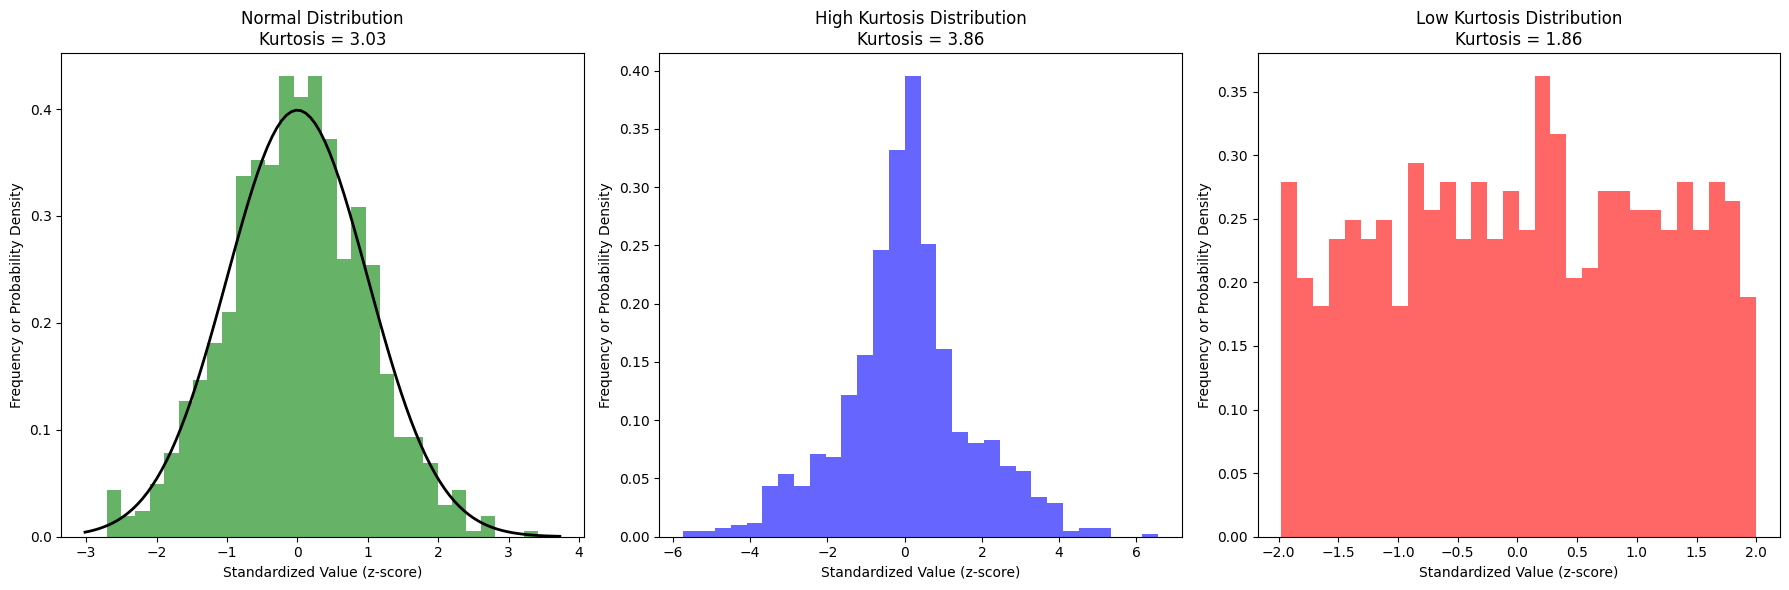

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis

# 正态分布
data_normal = np.random.normal(0, 1, 1000)

# 高峰度分布
data_high_kurt = np.concatenate([np.random.normal(0, 0.5, 300), np.random.normal(0, 2, 700)])

# 低峰度分布
data_low_kurt = np.random.uniform(-2, 2, 1000)

# 计算峰度
kurt_normal = kurtosis(data_normal, fisher=False)
kurt_high = kurtosis(data_high_kurt, fisher=False)
kurt_low = kurtosis(data_low_kurt, fisher=False)

# 绘制图像
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 正态分布
ax1.hist(data_normal, bins=30, density=true, alpha=0.6, color='g')
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
ax1.plot(x, p, 'k', linewidth=2)
ax1.set_title(f'Normal Distribution\nKurtosis = {kurt_normal:.2f}')
ax1.set_xlabel('Standardized Value (z-score)')
ax1.set_ylabel('Frequency or Probability Density')

# 高峰度分布
ax2.hist(data_high_kurt, bins=30, density=true, alpha=0.6, color='b')
ax2.set_title(f'High Kurtosis Distribution\nKurtosis = {kurt_high:.2f}')
ax2.set_xlabel('Standardized Value (z-score)')
ax2.set_ylabel('Frequency or Probability Density')

# 低峰度分布
ax3.hist(data_low_kurt, bins=30, density=true, alpha=0.6, color='r')
ax3.set_title(f'Low Kurtosis Distribution\nKurtosis = {kurt_low:.2f}')
ax3.set_xlabel('Standardized Value (z-score)')
ax3.set_ylabel('Frequency or Probability Density')

plt.tight_layout()
plt.show()


---

## 正态性检验的标准

| **指标** | **分类** | **描述** |
| --- | --- | --- |
| **偏度（Skewness）** | 数据分布的不对称性 | |
| **严重偏斜分布** | 1 < 偏度系数 或 偏度系数 < -1 | |
| **中度偏斜分布** | 0.5 < 偏度系数 < 1 或 -1 < 偏度系数 < -0.5 | |
| **轻微偏斜分布** | 0 < 偏度系数 < 0.5 或 -0.5 < 偏度系数 < 0 | |
| **负值** | 左偏分布（左长尾） | |
| **正值** | 右偏分布（右长尾） | |
| **峰度（Kurtosis）** | 数据分布的峰值高低 | |
| **非正态分布参考值** | 偏度 > 1；峰度 > 7 | |
| **标准正态分布** | 偏度 = 0；峰度 = 0 | |


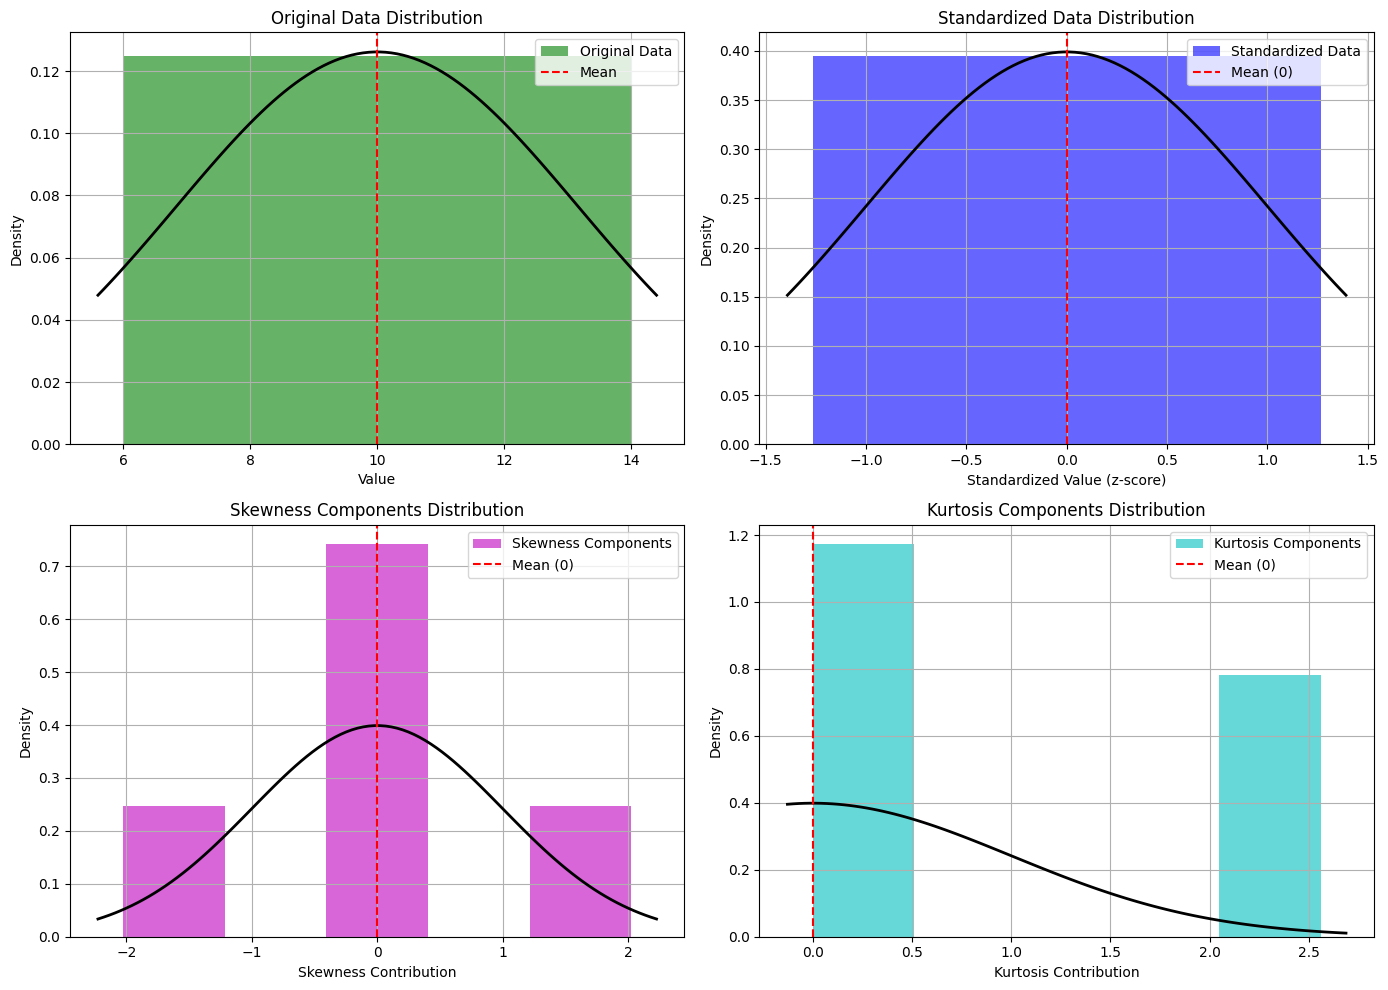

Skewness: 0.0000
Kurtosis: -1.9120


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 给定数据
data = [6, 8, 10, 12, 14]

# 计算均值和标准差
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# 标准化数据（z-scores）
standardized_data = [(x - mean) / std_dev for x in data]

# 计算偏度的每一步
skewness_components = [((x - mean) / std_dev) ** 3 for x in data]
skewness = np.mean(skewness_components)

# 计算峰度的每一步
kurtosis_components = [((x - mean) / std_dev) ** 4 for x in data]
kurtosis = np.mean(kurtosis_components) - 3

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 原始数据分布图
axs[0, 0].hist(data, bins=5, density=true, alpha=0.6, color='g', label='Original Data')
xmin, xmax = axs[0, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axs[0, 0].plot(x, p, 'k', linewidth=2)
axs[0, 0].axvline(mean, color='r', linestyle='--', label='Mean')
axs[0, 0].set_title('Original Data Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend()
axs[0, 0].grid(true)

# 标准化数据分布图
axs[0, 1].hist(standardized_data, bins=5, density=true, alpha=0.6, color='b', label='Standardized Data')
xmin, xmax = axs[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[0, 1].plot(x, p, 'k', linewidth=2)
axs[0, 1].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[0, 1].set_title('Standardized Data Distribution')
axs[0, 1].set_xlabel('Standardized Value (z-score)')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend()
axs[0, 1].grid(true)

# 偏度每一步计算图
axs[1, 0].hist(skewness_components, bins=5, density=true, alpha=0.6, color='m', label='Skewness Components')
xmin, xmax = axs[1, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[1, 0].plot(x, p, 'k', linewidth=2)
axs[1, 0].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[1, 0].set_title('Skewness Components Distribution')
axs[1, 0].set_xlabel('Skewness Contribution')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend()
axs[1, 0].grid(true)

# 峰度每一步计算图
axs[1, 1].hist(kurtosis_components, bins=5, density=true, alpha=0.6, color='c', label='Kurtosis Components')
xmin, xmax = axs[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axs[1, 1].plot(x, p, 'k', linewidth=2)
axs[1, 1].axvline(0, color='r', linestyle='--', label='Mean (0)')
axs[1, 1].set_title('Kurtosis Components Distribution')
axs[1, 1].set_xlabel('Kurtosis Contribution')
axs[1, 1].set_ylabel('Density')
axs[1, 1].legend()
axs[1, 1].grid(true)

plt.tight_layout()
plt.show()

# 打印偏度和峰度值
print(f'Skewness: {skewness:.4f}')
print(f'Kurtosis: {kurtosis:.4f}')


---


1. **选择检验方法**：根据数据特点和研究问题选择合适的检验方法。
2. **计算检验统计量**：根据样本数据计算检验统计量，例如t值、z值、F值或卡方值。
3. **确定分布**：根据检验方法选择相应的概率分布，例如t分布、z分布、F分布或卡方分布。
4. **查表或计算p值**：利用检验统计量和相应的概率分布查找临界值或计算p值。
5. **做出决策**：根据p值和显著性水平做出是否拒绝原假设的决策。


| 项目          | 解释                                                       |
| ------------- | ---------------------------------------------------------- |
| 概率分布      | 描述随机变量可能取值及其概率的数学函数（如t分布、z分布等） |
| 检验方法      | 基于概率分布进行假设检验的统计程序（如t检验、z检验等）     |
| 判断标准      | 根据检验结果做出决策的准则（如p值是否小于0.05）           |


# 数据分布的确认


### 各分布的详细信息

| 分布类型         | 判断方法                             | 使用场景                                      | 适用的检验方法                                      | 生活化例子                                               |
| ---------------- | ------------------------------------ | --------------------------------------------- | -------------------------------------------------- | ------------------------------------------------------ |
| 正态分布 (Normal Distribution) | 正态性检验（如Shapiro-Wilk检验、Kolmogorov-Smirnov检验） | 自然现象和误差的分布，许多生物学和社会科学数据 | z检验、t检验、ANOVA、回归分析、控制图              | 人的身高分布通常接近正态分布，大多数人的身高集中在平均值附近。 |
| t分布 (t-distribution) | 检验统计量近似t分布               | 小样本均值假设检验                            | 单样本t检验、独立样本t检验、配对样本t检验         | 比较少量学生考试成绩的均值是否显著不同于全班平均成绩。     |
| z分布 (Standard Normal Distribution) | 大样本时，数据标准化后近似z分布  | 大样本均值假设检验，比例检验                    | z检验、比例检验、控制图                            | 大规模调查中，人们的年收入标准化后通常服从z分布。         |
| F分布 (F-distribution) | 检验统计量近似F分布               | 比较方差、方差分析                            | 方差分析（ANOVA）、方差齐性检验                    | 比较不同肥料对植物生长的效果，分析各组之间的差异。         |
| 卡方分布 (Chi-square distribution) | 检验统计量近似卡方分布           | 离散数据分析、拟合优度检验、独立性检验         | 卡方检验（拟合优度检验、独立性检验）、方差齐性检验 | 检验不同品牌的手机在不同人群中的受欢迎程度是否有显著差异。 |
| 二项分布 (Binomial Distribution) | 成功和失败的离散次数               | 固定次数试验中的成功次数，如投硬币、生产缺陷   | 二项检验                                          | 投掷10次硬币，记录正面朝上的次数。                       |
| 泊松分布 (Poisson Distribution) | 事件发生次数的离散数据              | 固定时间/空间内的稀有事件，如电话呼入数         | 泊松检验                                          | 某商店每天的顾客到访次数。                               |
| 指数分布 (Exponential Distribution) | 事件间隔时间的连续数据              | 事件之间的时间间隔，如设备的寿命                | 指数分布检验                                      | 一盏路灯的平均故障间隔时间。                             |
| Gamma分布 (Gamma Distribution) | 数据具有正偏态分布                 | 寿命数据分析、排队论、可靠性分析                | Gamma检验                                         | 各类电器的使用寿命。                                     |
| Beta分布 (Beta Distribution) | 数据在0到1之间                      | 描述概率和比例，如概率估计、贝叶斯分析          | Beta检验                                          | 人们完成任务的进度百分比。                               |
| 几何分布 (Geometric Distribution) | 首次成功前的失败次数                | 首次成功前的失败次数，如投掷直到第一次成功      | 几何分布检验                                      | 投掷一个硬币直到第一次出现正面所需的次数。               |
| 超几何分布 (Hypergeometric Distribution) | 成功次数的离散数据，不放回抽样         | 有限总体中不放回抽样的成功次数，如抽奖          | 超几何分布检验                                    | 抽奖活动中从奖池中抽取中奖券的次数。                     |
| Logistic分布 (Logistic Distribution) | 对称，尾部较重                      | 回归分析，尤其是Logistic回归，描述成长过程      | Logistic回归分析                                  | 描述一个产品从引入到市场饱和的增长过程。                 |
| 威布尔分布 (Weibull Distribution) | 数据具有正偏态分布，尾部较长           | 可靠性分析、寿命数据分析                        | 威布尔分析                                       | 预测灯泡的寿命，很多灯泡的寿命分布符合威布尔分布。       |


---


### 分布类型及代表性分析方法

好的，这里是调整后的表格，包含了详细的参数说明：

### 分布类型及代表性分析方法

| 分布类型                | 代表性分析方法                          | 用途                                                      | 公式                                                                                                                                                   | 生活化例子                                             |
| ----------------------- | ---------------------------------------- | --------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------ |
| t分布 (t-distribution)  | 单样本t检验 (One-sample t-test)         | 检验一个样本均值是否等于已知值，适用于小样本量            | $ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $                                                                                                            | 检验一个班级的考试平均成绩是否显著高于全校平均成绩     |
|                         | 独立样本t检验 (Independent t-test)      | 比较两个独立样本的均值是否有显著差异，适用于小样本量      | $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}} $                                                                                   | 比较两个班级的考试平均成绩是否有显著差异               |
|                         | 配对样本t检验 (Paired t-test)           | 比较配对样本的均值差异，适用于小样本量                    | $ t = \frac{\bar{d}}{s_d / \sqrt{n}} $                                                                                                               | 比较同一班级学生在期中和期末考试中的成绩差异           |
| z分布 (Standard normal Distribution) | 单样本z检验 (One-sample z-test)         | 检验一个样本均值是否等于已知值，适用于大样本量            | $ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} $                                                                                                       | 检验一个工厂生产的零件平均长度是否等于目标值           |
|                         | 独立样本z检验 (Independent z-test)      | 比较两个独立样本的均值或比例是否有显著差异，适用于大样本量 | $ z = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $                                                         | 比较两家工厂生产的零件合格率是否有显著差异             |
|                         | 比例z检验 (Proportion z-test)           | 比较两个样本比例是否有显著差异，适用于大样本量            | $ z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}} $                                          | 比较两组不同治疗方法的治愈率是否有显著差异             |
| F分布 (F-distribution)  | 单因素方差分析 (One-way ANOVA)          | 比较多个组的均值是否有显著差异                            | $ F = \frac{MS_{\text{between}}}{MS_{\text{within}}} $                                                                                               | 比较不同肥料对作物生长的影响是否有显著差异             |
|                         | 双因素方差分析 (Two-way ANOVA)          | 同时比较两个因素对均值的影响及其交互作用                  | $ F = \frac{MS_{\text{A}} + MS_{\text{B}} + MS_{\text{AB}}}{MS_{\text{E}}} $                                                                         | 研究不同教学方法和不同学习时间对学生成绩的影响         |
|                         | F检验 (F-test)                          | 比较两个样本的方差是否有显著差异，常作为t检验的前提条件   | $ F = \frac{s_1^2}{s_2^2} $                                                                                                                          | 检验两种不同材料的拉伸强度的方差是否相等               |
| 卡方分布 (Chi-square Distribution) | 独立性检验 (Chi-square test for Independence) | 检验两个分类变量是否独立                                  | $ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $                                                                                                           | 检验性别和职业选择是否有独立性                         |
|                         | 适配度检验 (Chi-square Goodness of Fit test) | 检验观测数据是否符合某个预期分布                          | $ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $                                                                                                           | 检验一组骰子投掷结果是否符合均匀分布                   |
|                         | 卡方检验 (Chi-square test)              | 用于频数数据的分析，适用于检验实际观察频数与理论预期频数的差异 | $ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $                                                                                                           | 检验某城市不同地区的疾病发病率是否与总体分布一致       |

### 参数说明

- $ \bar{x} $：样本均值
- $ \mu $：总体均值
- $ s $：样本标准差
- $ n $：样本量
- $ s_1^2 $、$ s_2^2 $：两个样本的方差
- $ \sigma $：总体标准差
- $ \hat{p}_1 $、$ \hat{p}_2 $：两个样本的比例
- $ \hat{p} $：总体比例
- $MS_{\text{between}} = \frac{SS_{\text{between}}}{df_{\text{between}}}$：组间均方
- $MS_{\text{within}} = \frac{SS_{\text{within}}}{df_{\text{within}}}$：组内均方
    - $SS_{\text{between}}$：组间平方和
    - $SS_{\text{within}}$：组内平方和
    - $df_{\text{between}}$：组间自由度
    - $df_{\text{within}}$：组内自由度
- $ MS_{\text{A}} = \frac{SS_{\text{A}}}{df_{\text{A}}} $：因素A的均方
- $ MS_{\text{B}} = \frac{SS_{\text{B}}}{df_{\text{B}}} $：因素B的均方
- $ MS_{\text{AB}} = \frac{SS_{\text{AB}}}{df_{\text{AB}}} $：交互作用的均方
- $ MS_{\text{E}} = \frac{SS_{\text{E}}}{df_{\text{E}}} $：误差均方
- $ O_i $：观测频数
- $ E_i $：期望频数

- 自由度：$ df=n−1 $
- 组间自由度：$ df_{\text{between}} = k - 1 $
  其中，$k$是组的数量。
- 组内自由度：$ df_{\text{within}} = n - k $
  其中，$n$是总样本量。

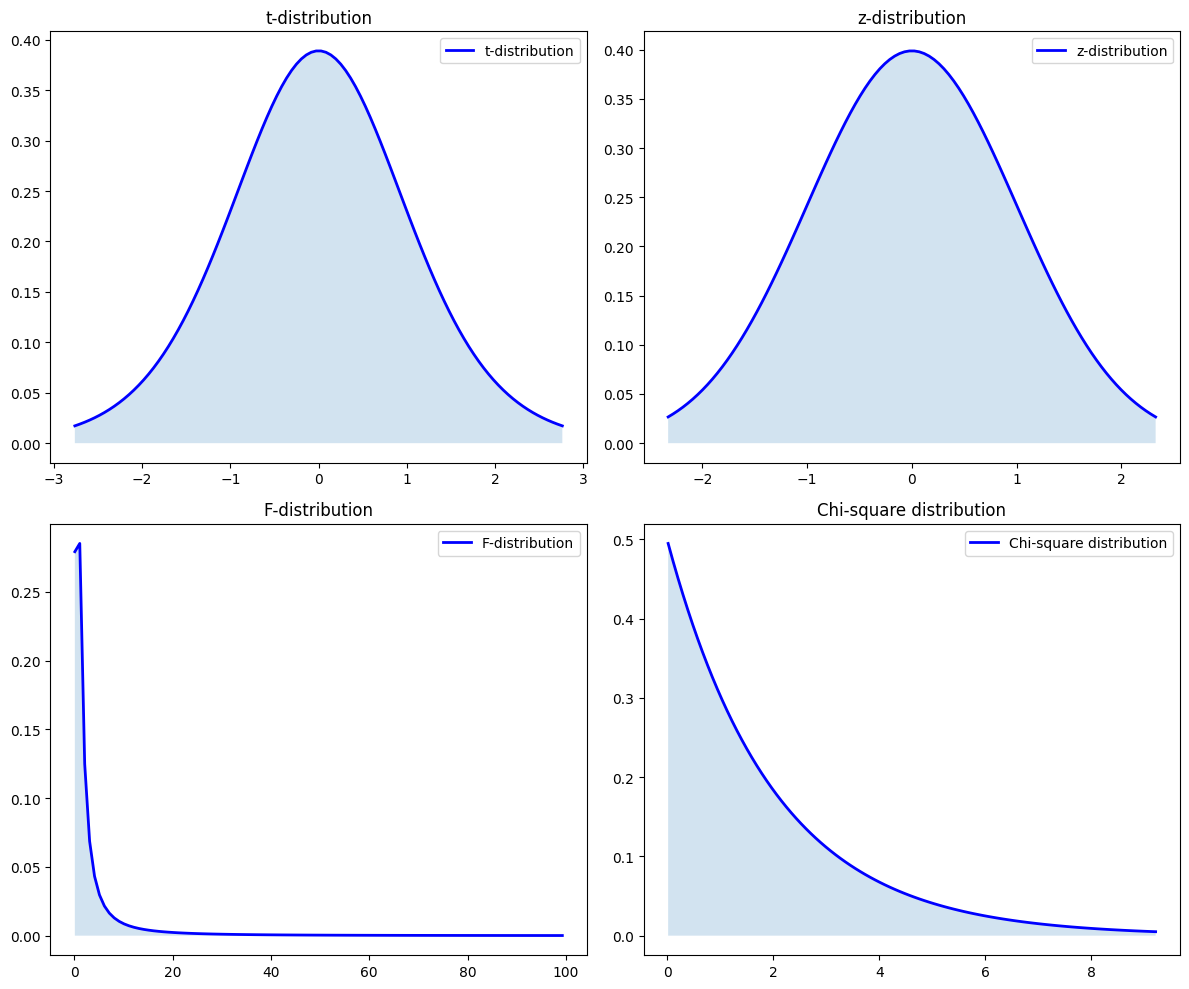

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the distributions to plot
distributions = [
    ('t-distribution', stats.t(df=10)),
    ('z-distribution', stats.norm),
    ('F-distribution', stats.f(dfn=5, dfd=2)),
    ('Chi-square distribution', stats.chi2(df=2)),
]

# Plot each distribution
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, dist) in zip(axs.flatten(), distributions):
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    y = dist.pdf(x)
    ax.plot(x, y, 'b-', lw=2, label=name)
    ax.fill_between(x, y, alpha=0.2)
    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()


- 中心极限定理：只要n自由度充分大，样本就趋于正态分布。
- 伽尔顿板仿真： http://vr.1zhidian.cn/bean/
- 正态分布仿真： https://www.randomservices.org/random/apps/SpecialSimulator.html
